# TFM: Inteligencia Artificial al Servicio de la Salud: Un Enfoque Integral para la Predicción de Riesgos Cardiovasculares

## Importamos librerias

In [90]:
# Análisis exploratorio de datos:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import math

In [91]:
#Modelado
# Importar librerias
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

### 1. Lectura de Datos

In [92]:
#Para Collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#Para Collab
# Ruta al archivo CSV en tu Google Drive
file_path = '/content/drive/MyDrive/TFM/CVD_cleaned.csv'

# Cargar el archivo CSV con pandas
df = pd.read_csv(file_path)

In [95]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [96]:
df.shape

(308854, 19)

 Nos encontramos con dataset con 19 columnas, y 308854 filas, es decir, datos entrantes. Teniendo en cuenta el contexto de este dataset, podemos decir que a primera vista tenemos 19 tipos de datos diferentes relacionados con la salud de 308854 pacientes.

### 2. Analisis Exploratorio (EDA)

#### 2.1 Analisis Descriptivo del Conjunto de Variables

###### Caracteriticas de las variables de dataset

In [97]:
#Nombre de las columnas
print(df.columns.values)

['General_Health' 'Checkup' 'Exercise' 'Heart_Disease' 'Skin_Cancer'
 'Other_Cancer' 'Depression' 'Diabetes' 'Arthritis' 'Sex' 'Age_Category'
 'Height_(cm)' 'Weight_(kg)' 'BMI' 'Smoking_History' 'Alcohol_Consumption'
 'Fruit_Consumption' 'Green_Vegetables_Consumption'
 'FriedPotato_Consumption']


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Asi pues, nos encontramos con lo que parece a primera vista 12 variables categorias, y 7 variables numericas. Tendremos que mirar esto en mas detalle posteriormente.

###### Estudio de valores duplicados

In [99]:
# Estudiar si hay filas duplicadas
df.duplicated().sum()

80

In [100]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


Al estudiar si habia valores duplicados, nos hemos percatado que tenemos 80 filas con valores indénticos. Al no contar en este dataset con un id identificador, nos podriamos platear si realmente son datos duplicados, o da la casualidad que hay pacientes que presentan las mismas características, o tambien puede deberse a que un mismo paciente a acudido en varias ocasiones. No obstante, al representar estas 80 filar el 0,025% de los datos, procedemos a eliminarlos para evitar errores.

Asi pues, nos quedamos con un total de 308774 datos entrantes.

###### Estudiar Valores Unicos y Nulos/Missing

In [101]:
#Valores Unicos
df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

In [102]:
#Valores Nulos en Variables
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [103]:
# Calcular la proporción de valores faltantes por observación
prop_missings = df.isna().sum(axis=1) / df.shape[1] * 100

# Mostrar estadísticas descriptivas de la distribución
print(prop_missings.describe())

count    308854.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
dtype: float64


Identificamos que no tenemos datos faltantes o missing, y por otro lado, las variable tipo objeto mostradas anteriormente parecen tener pocos valores unicos, por lo que nos confirma que todas aquellas con entre 2 y 13 valores unicos las transformaremos más adelante a categoricas. En el caso de aquellas variables con 2 valores únicos debemos estudiar posteriormente si transformarlas a categoricas, o binarias.

Respecto a la variable Age_Category, tal vez sea interesante agrupar rangos de edades para disminuir el numeros de categorias que tenemos. Lo estudiaremos mas adelante.

##### Identificación Outliers

In [104]:
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

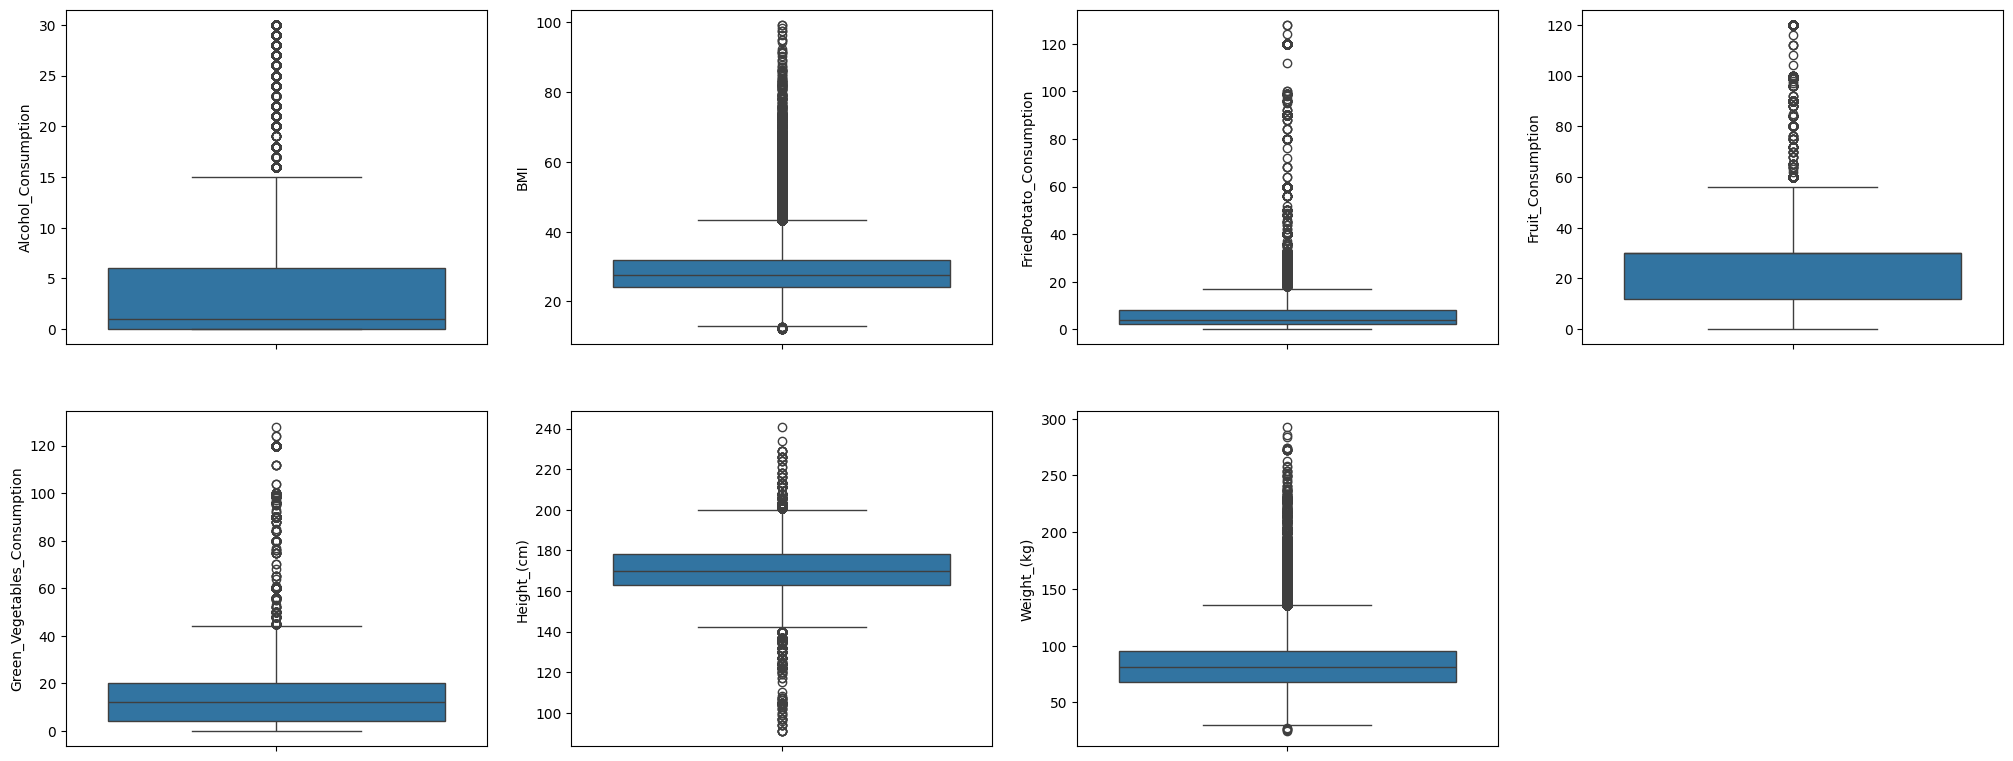

In [105]:
#Identificación Outliers
plt.figure(figsize=(25, 20))
for i, column in enumerate(numerical,1):
    plt.subplot(4,4,i)
    sns.boxplot(y=df[column])

A traves de este boxplot hemos identificado que tenemos valores atipicos en nuestras 7 variables numericas, lo cual tendremos que estudiar posteriormente como diliar con estos valores.

A priori, sabemos que habra que trabajar los valores atipicos de Height, Weight, y BMI, mientras que para  Alcohol, Fruit, Green Vegetables and Fried potato consumption habrá que estudiar si son verdaderos o no.

##### Variables con valores igual a 0

In [106]:
#Variables tienen valores igual a 0
valores_iguales_a_cero = (df == 0).sum()
(valores_iguales_a_cero/308774)*100


General_Health                   0.000000
Checkup                          0.000000
Exercise                         0.000000
Heart_Disease                    0.000000
Skin_Cancer                      0.000000
Other_Cancer                     0.000000
Depression                       0.000000
Diabetes                         0.000000
Arthritis                        0.000000
Sex                              0.000000
Age_Category                     0.000000
Height_(cm)                      0.000000
Weight_(kg)                      0.000000
BMI                              0.000000
Smoking_History                  0.000000
Alcohol_Consumption             45.425457
Fruit_Consumption                2.698738
Green_Vegetables_Consumption     6.927073
FriedPotato_Consumption         14.325364
dtype: float64

Solo tenemos las variables: Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, y FriedPotato_Consumption con valores 0. De aqui, podemos entender que el 0 representa el no consumo de estos alimentos por parte de los pacientes.

#### 2.2 Analisis de la Variable Objetivo

In [107]:
# Establecemos la variable objetivo
target = 'Heart_Disease'

In [108]:
#Caracteristicas de la variable objetivo
df[target].describe()

count     308854
unique         2
top           No
freq      283883
Name: Heart_Disease, dtype: object

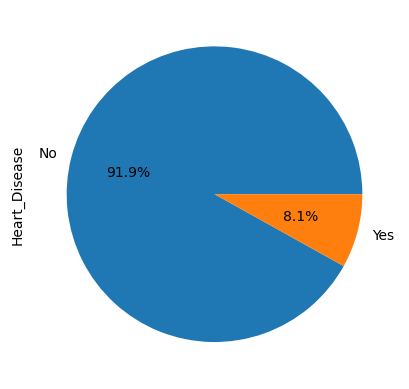

In [109]:
# Analisis de la distribución de la variable objetivo
df[target].value_counts().plot.pie(autopct='%1.1f%%')  # *NOTA
plt.show()


In [110]:
df[target].value_counts()

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

Tampoco observamos valores mal codificados en nuestra variable objetivo. No obstante, si seria interesante hacer algun cambio podriamos modificar mas adelante los valores de checkup y diabetes.

#### 2.3 Analisis Variables Dependientes

In [111]:
# Estudiar si son variables numericas o categoricas
print(f'Hay un total de {len(categorical)} variables categoricas')
print(f'Hay un total de {len(numerical)} variables numericas')

Hay un total de 12 variables categoricas
Hay un total de 7 variables numericas


##### 2.3.1 Variables Numericas

In [112]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02


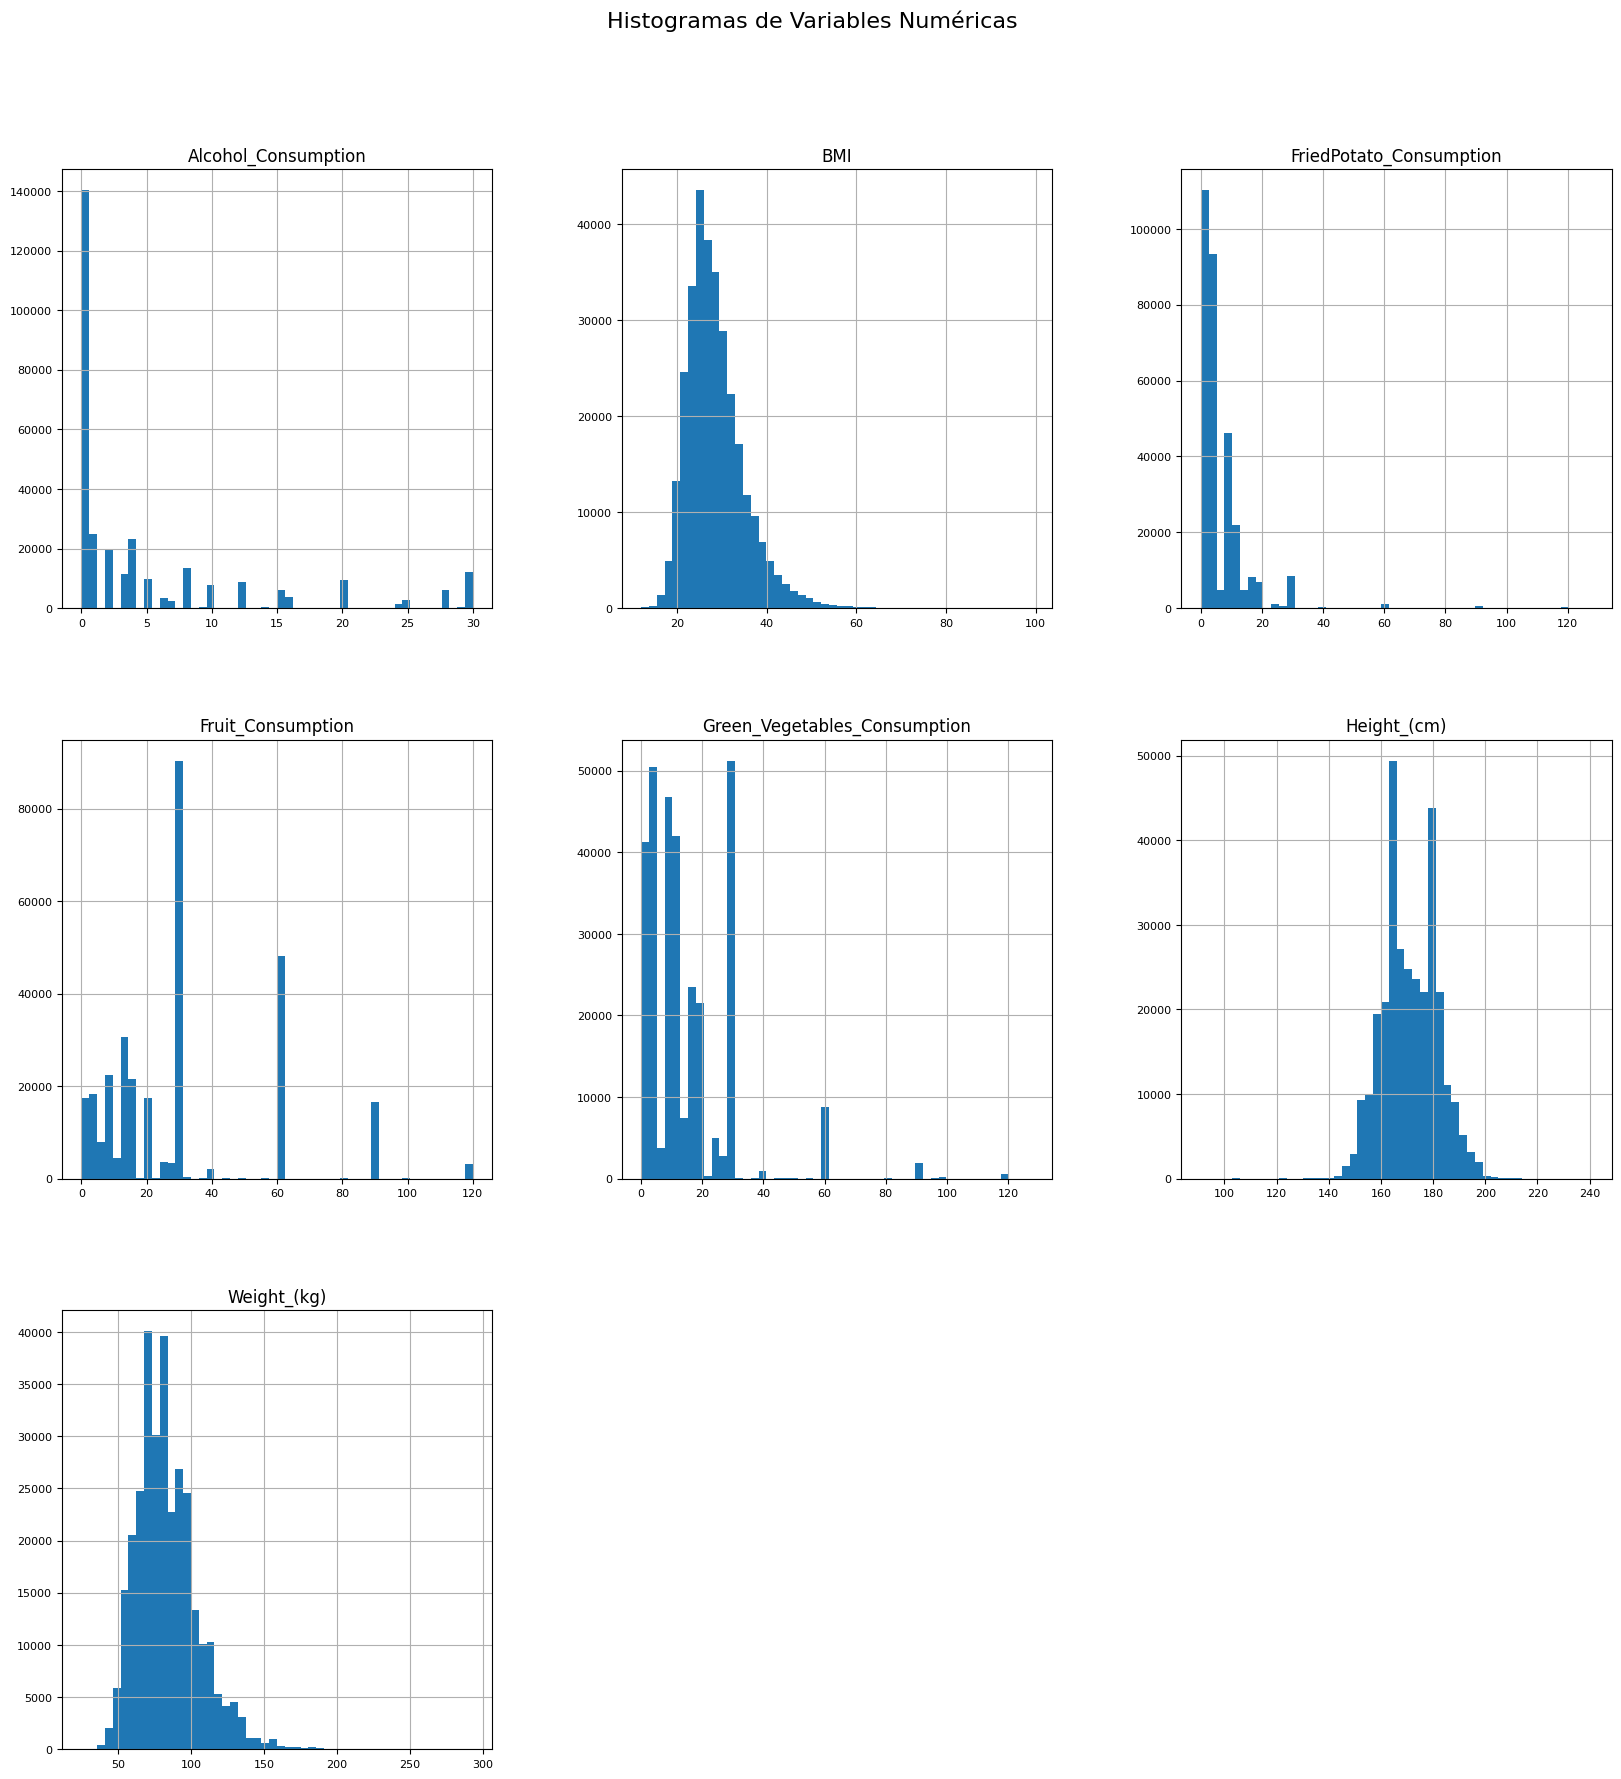

In [113]:
# Visualización Variables Numericas
df[numerical].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

##### 2.3.2 Variables Categoricas

In [114]:
df[categorical].describe().T

,count,unique,top,freq
Age_Category,308854,13,65-69,33434
Arthritis,308854,2,No,207783
Checkup,308854,5,Within the past year,239371
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Exercise,308854,2,Yes,239381
General_Health,308854,5,Very Good,110395
Heart_Disease,308854,2,No,283883
Other_Cancer,308854,2,No,278976
Sex,308854,2,Female,160196


In [115]:
#Recuento de los valores de las variables categoricas
df['General_Health'].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

In [116]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [117]:
df['Exercise'].value_counts()

Yes    239381
No      69473
Name: Exercise, dtype: int64

In [118]:
df['Skin_Cancer'].value_counts()

No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64

In [119]:
df['Other_Cancer'].value_counts()

No     278976
Yes     29878
Name: Other_Cancer, dtype: int64

In [120]:
df['Depression'].value_counts()

No     246953
Yes     61901
Name: Depression, dtype: int64

In [121]:
df['Diabetes'].value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

In [122]:
df['Arthritis'].value_counts()

No     207783
Yes    101071
Name: Arthritis, dtype: int64

In [123]:
df['Sex'].value_counts()

Female    160196
Male      148658
Name: Sex, dtype: int64

In [124]:
df['Smoking_History'].value_counts()

No     183590
Yes    125264
Name: Smoking_History, dtype: int64

In [125]:
df['Age_Category'].value_counts().sort_index()

18-24    18681
25-29    15494
30-34    18428
35-39    20606
40-44    21595
45-49    20968
50-54    25097
55-59    28054
60-64    32418
65-69    33434
70-74    31103
75-79    20705
80+      22271
Name: Age_Category, dtype: int64

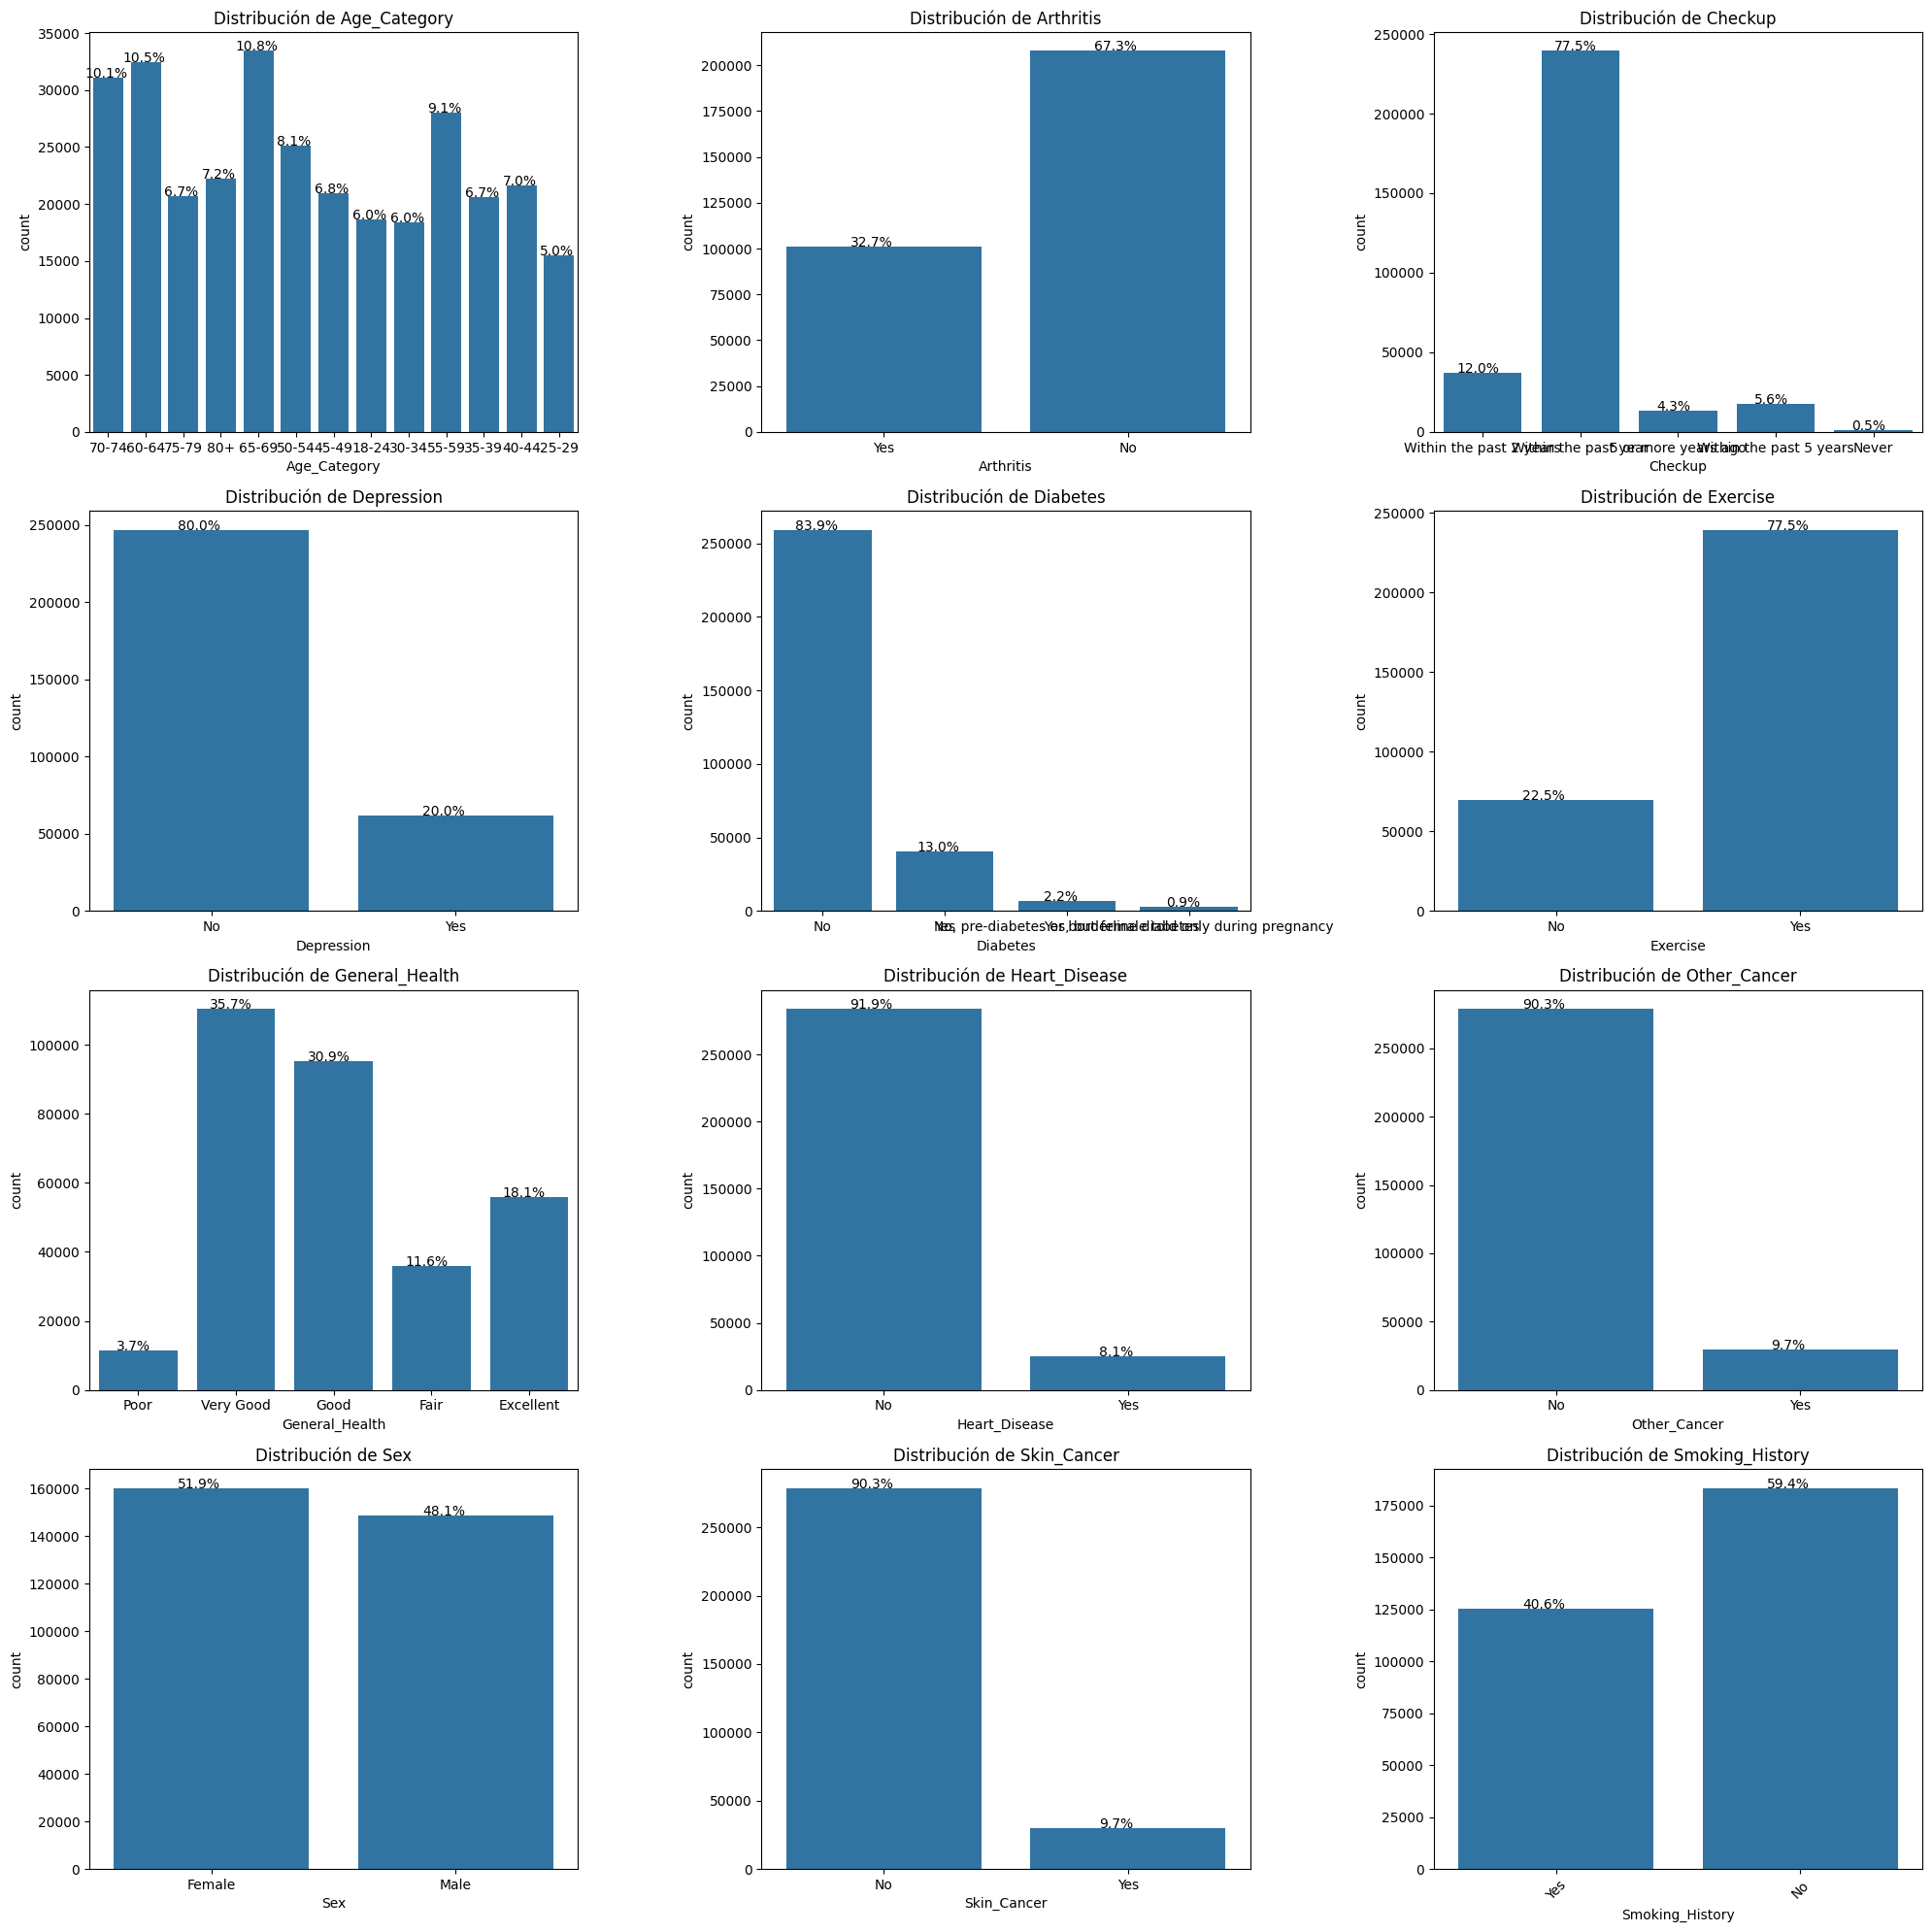

In [126]:
# Visualización Variables Categoricas
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, col in enumerate(categorical):
    try:
        sns.countplot(x=col, data=df, ax=axs[i//3, i%3])
        axs[i//3, i%3].set_title(f'Distribución de {col}')
        total = len(df[col])
        for p in axs[i//3, i%3].patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            axs[i//3, i%3].annotate(percentage, (x, y), ha='center')
    except IndexError:
        break
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identificamos que no hay valores mal condificados en nuestras variables categoricas.

#### 2.4 Relación entre las variables

###### Relación de las variables numerical con la objetivo

In [127]:
def eda_bivariate_numerical(df, column, target):

    fig, ax = plt.subplots(figsize=(9, 8))

    color = 'Set2'
    palette_color = sns.color_palette(color)

    ax = sns.scatterplot(x=column, y=target, data=df, hue=target, palette=color)
    ax.set_ylabel(target)
    ax.set_xlabel(column)

    plt.show()


Alcohol_Consumption vs. Heart_Disease


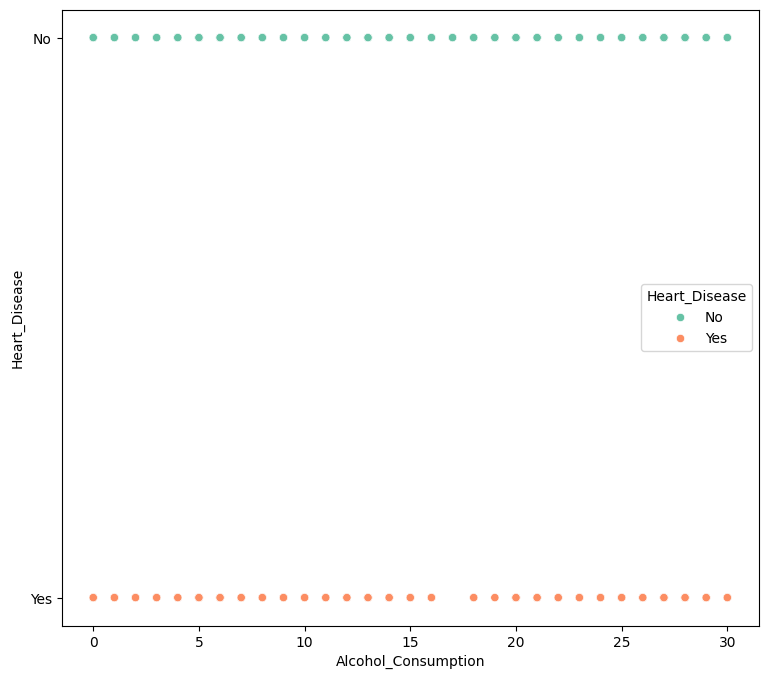

BMI vs. Heart_Disease


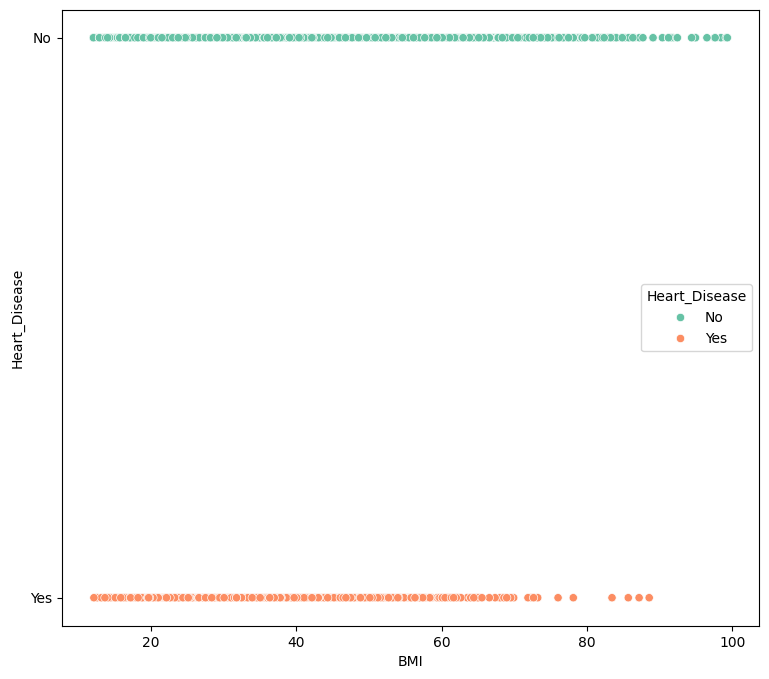

FriedPotato_Consumption vs. Heart_Disease


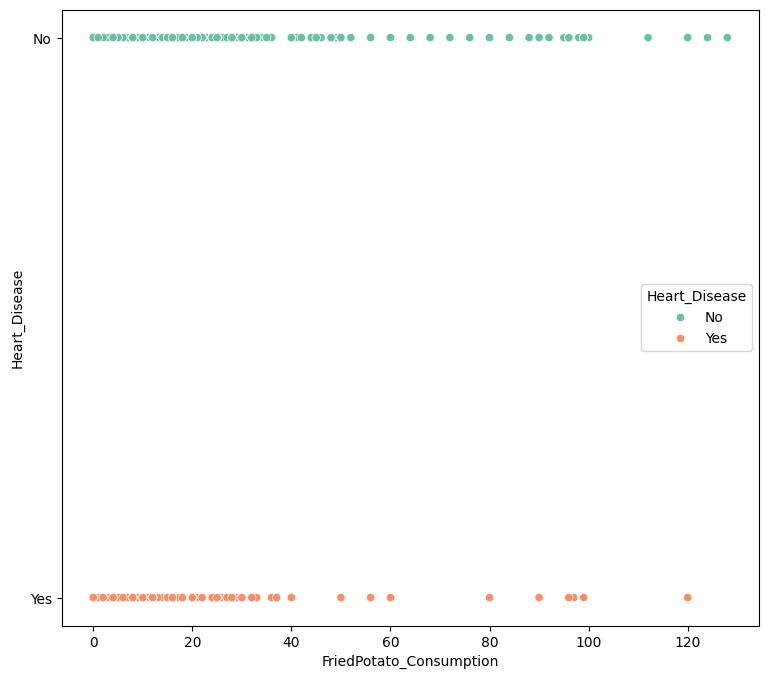

Fruit_Consumption vs. Heart_Disease


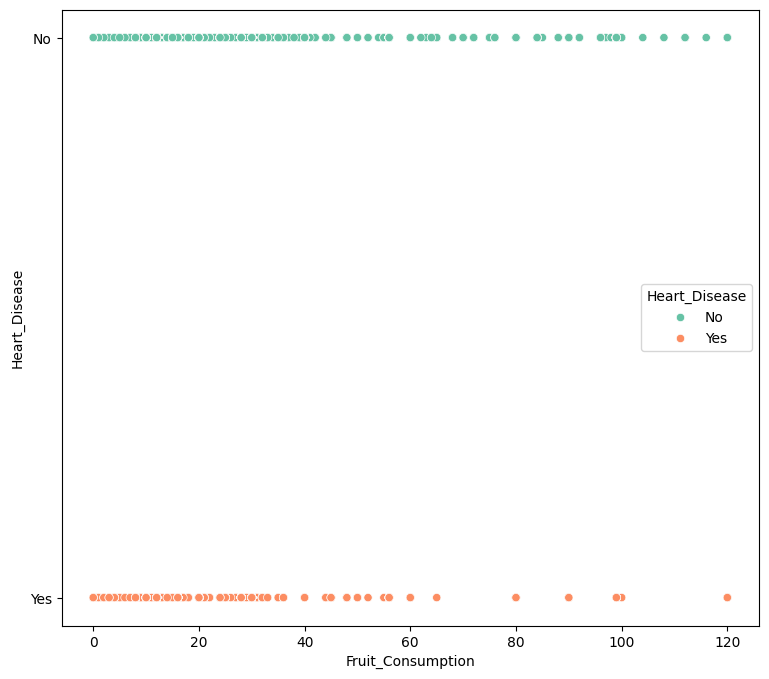

Green_Vegetables_Consumption vs. Heart_Disease


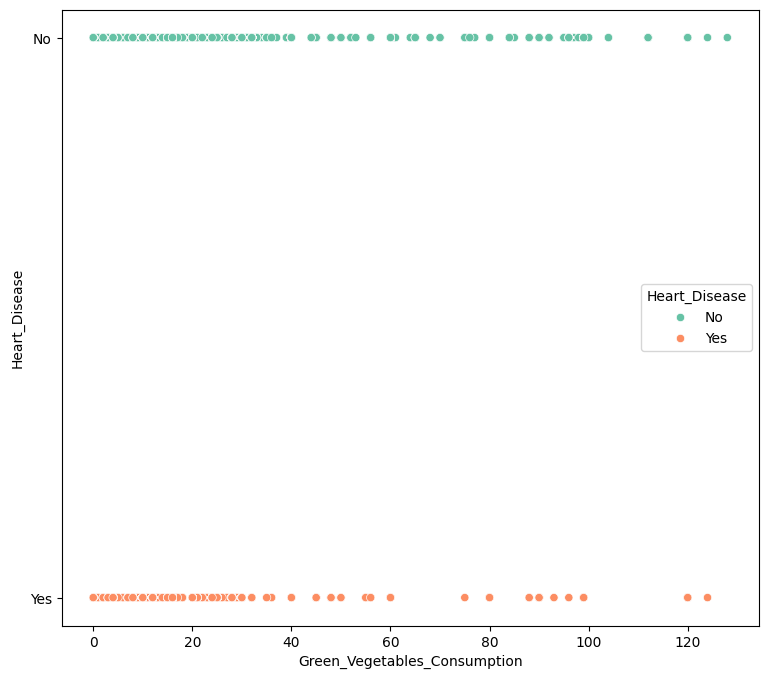

Height_(cm) vs. Heart_Disease


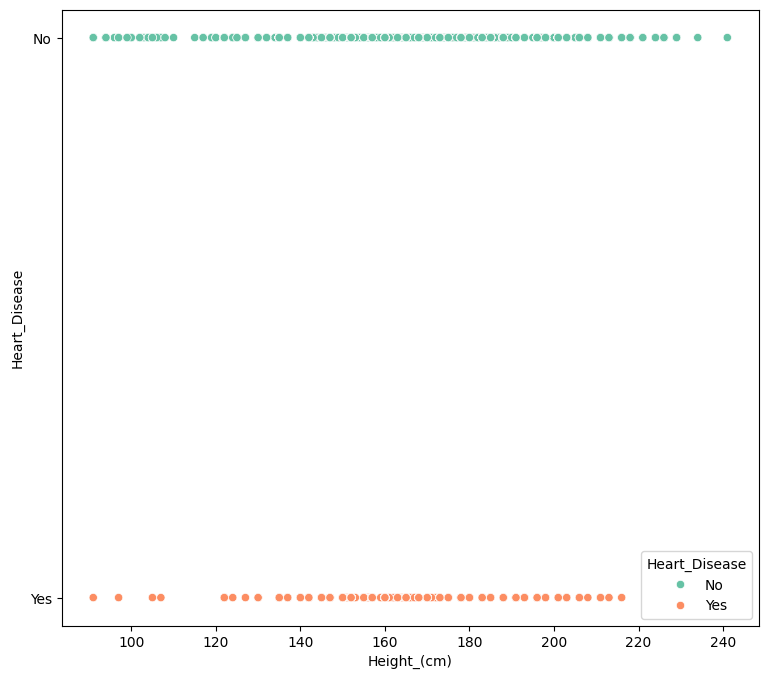

Weight_(kg) vs. Heart_Disease


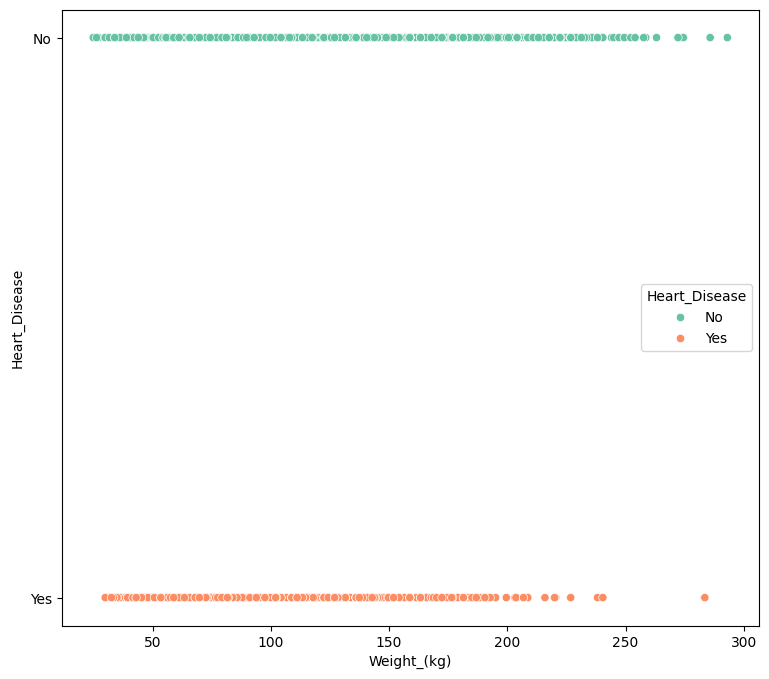

In [128]:
for i in numerical:
    if i == target:
        continue

    print(f'{i} vs. {target}')

    # Verifica si la variable es categórica o numérica
    if i in categorical:
        if df[i].nunique() > 15:
            print(f'Column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue
        # eda_bivariate_categorical(df, i, target)
    elif i in numerical:
        eda_bivariate_numerical(df, i, target)

    print('=======================================================')

###### Relación de las variables categoricas con la objetivo

In [129]:
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (15,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j]
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()


#### 2.5 Visualizaciones

Age_Category vs. Heart_Disease


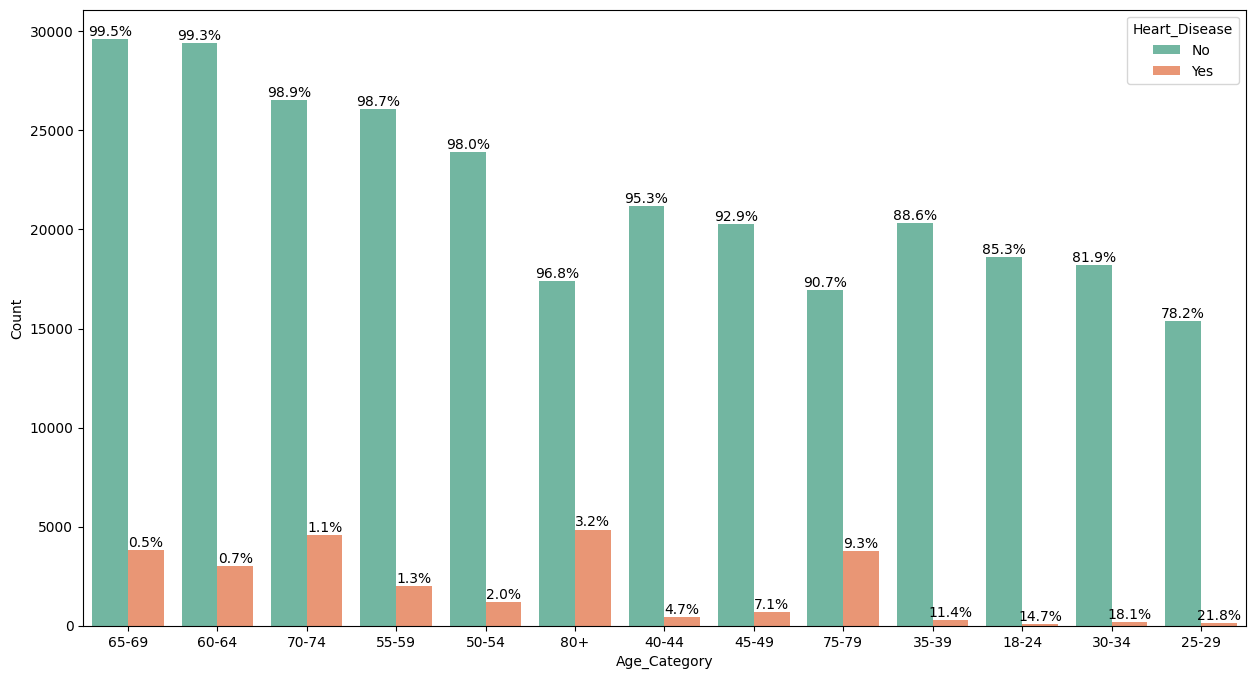

Arthritis vs. Heart_Disease


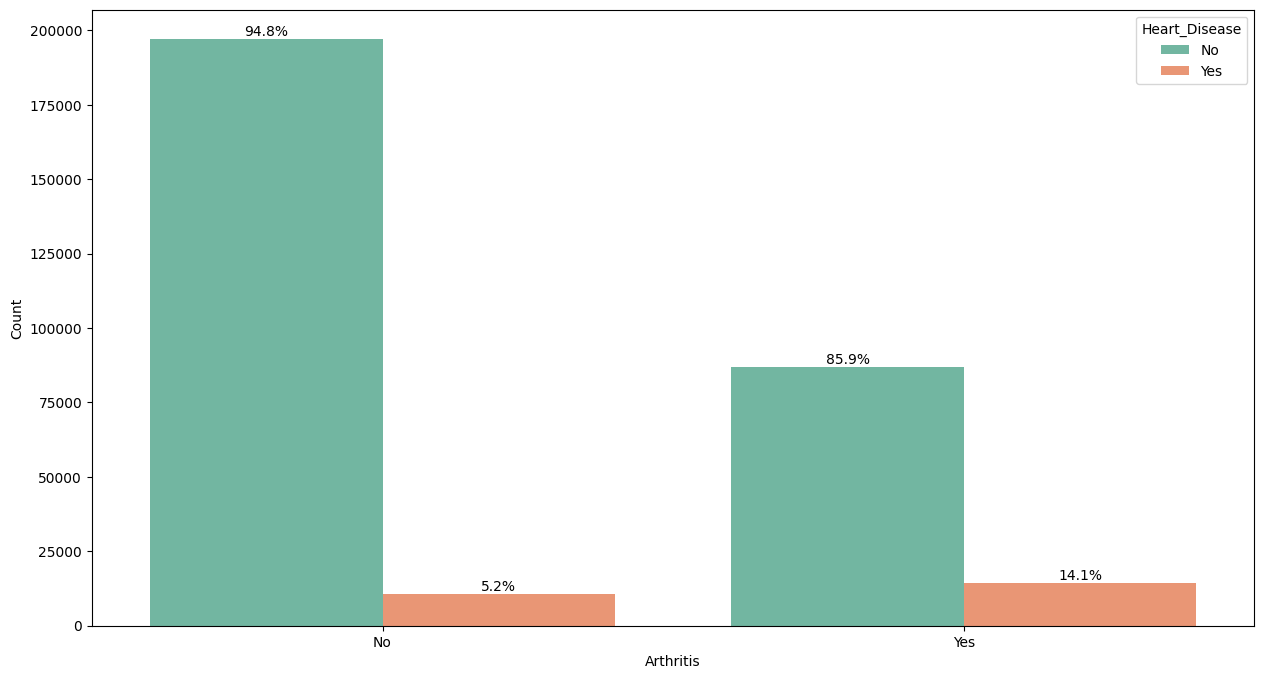

Checkup vs. Heart_Disease


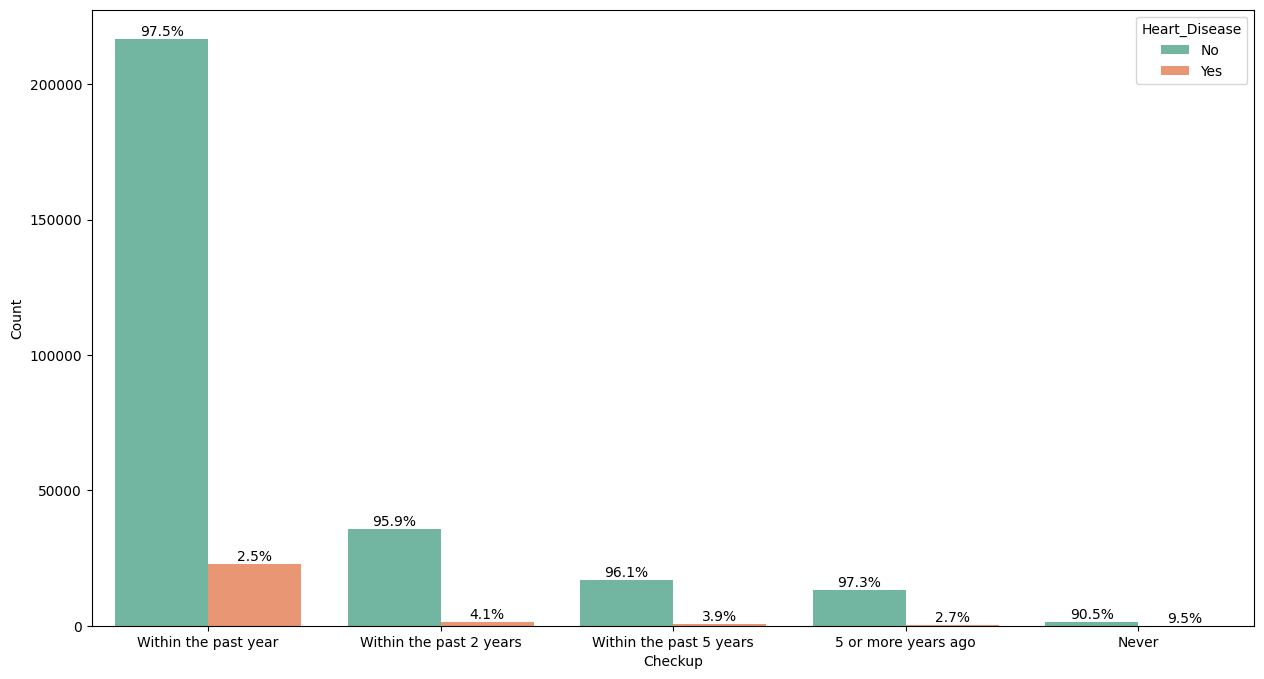

Depression vs. Heart_Disease


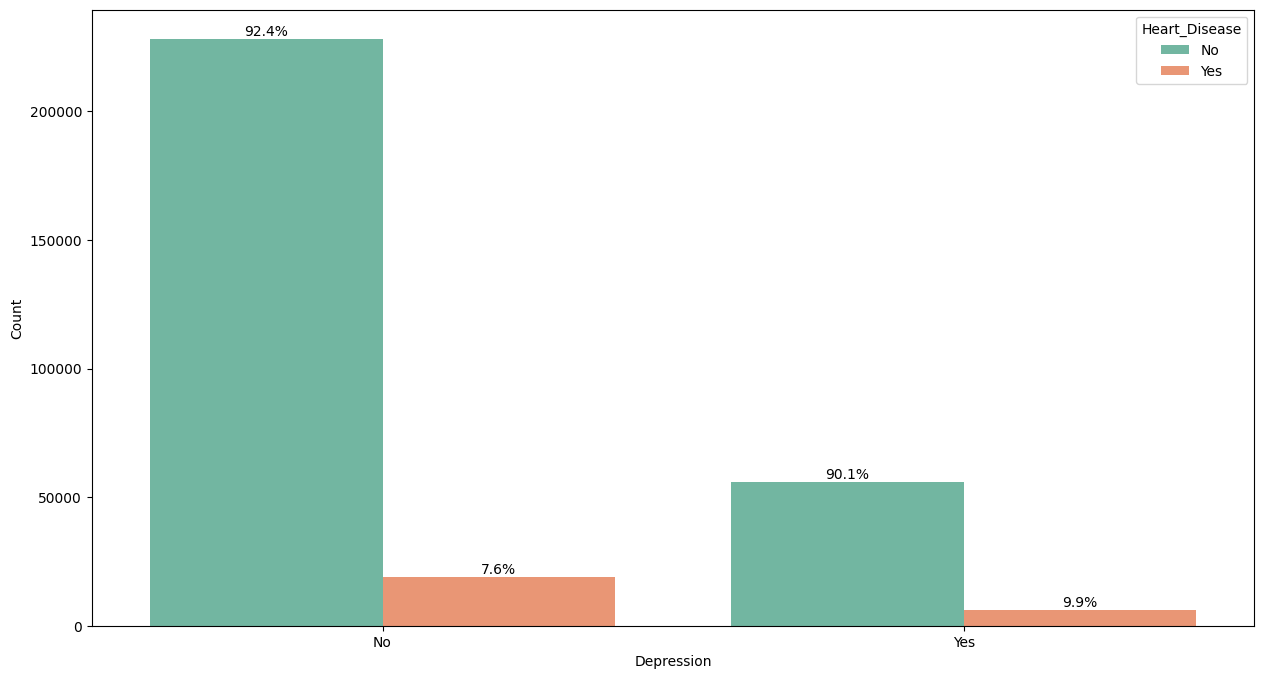

Diabetes vs. Heart_Disease


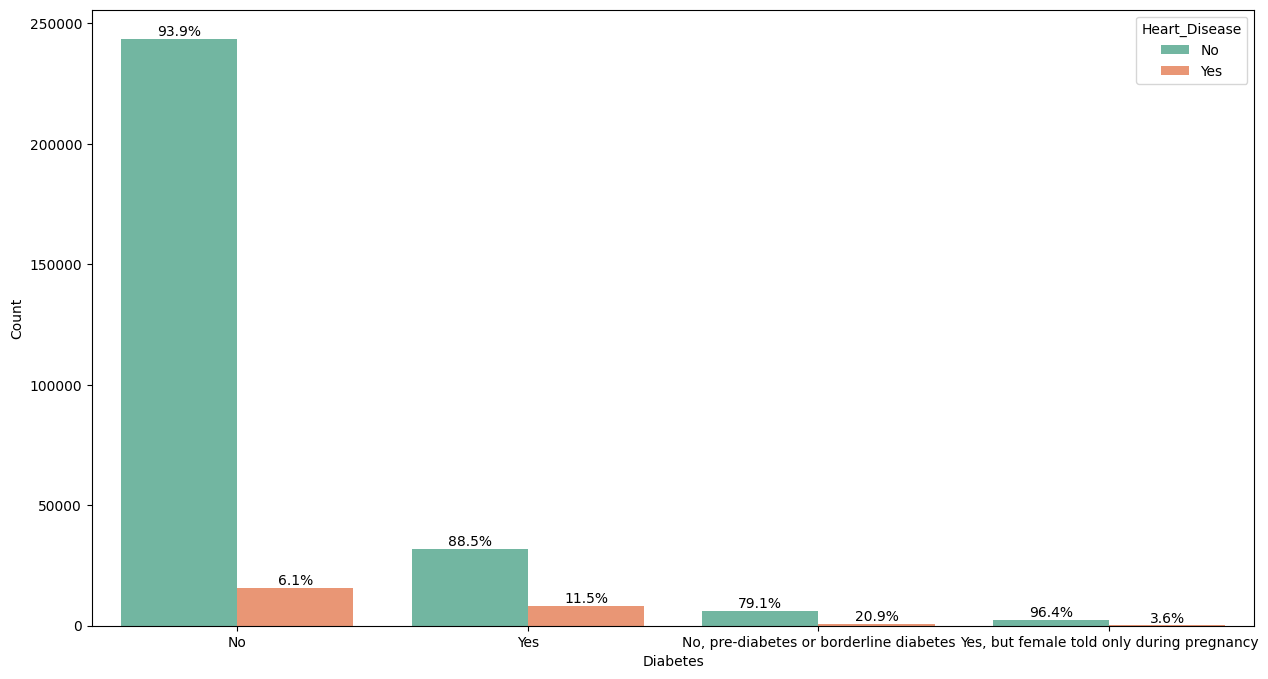

Exercise vs. Heart_Disease


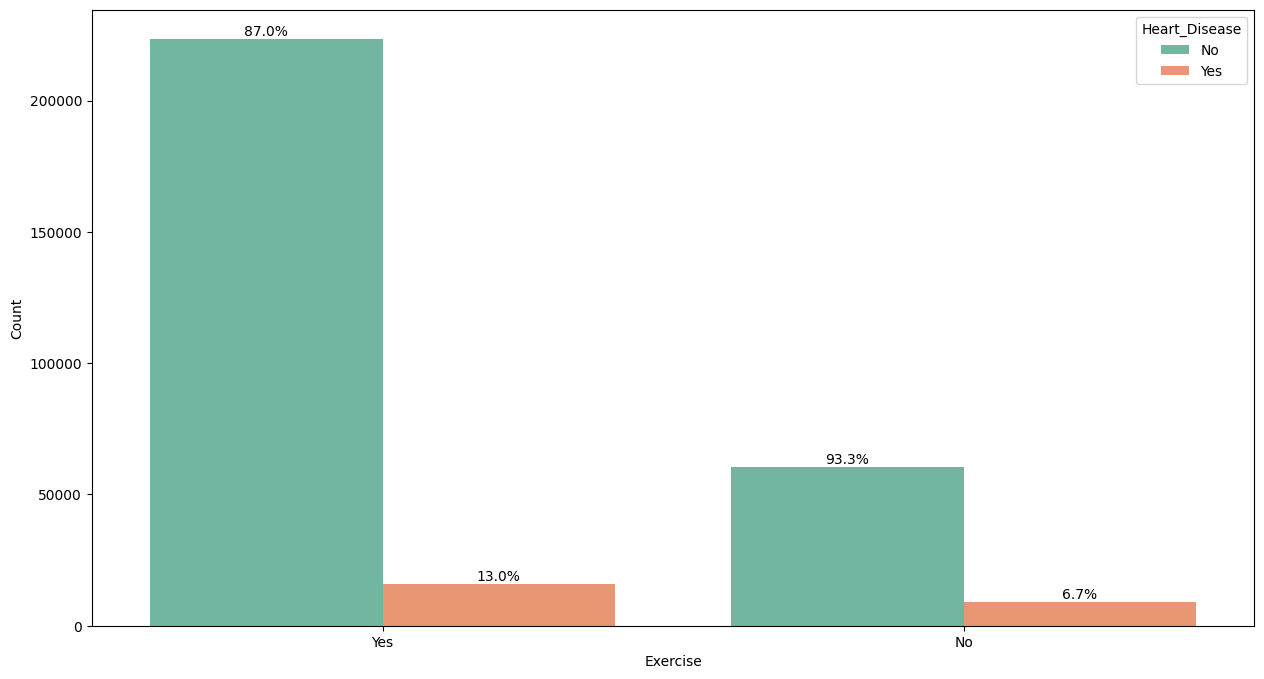

General_Health vs. Heart_Disease


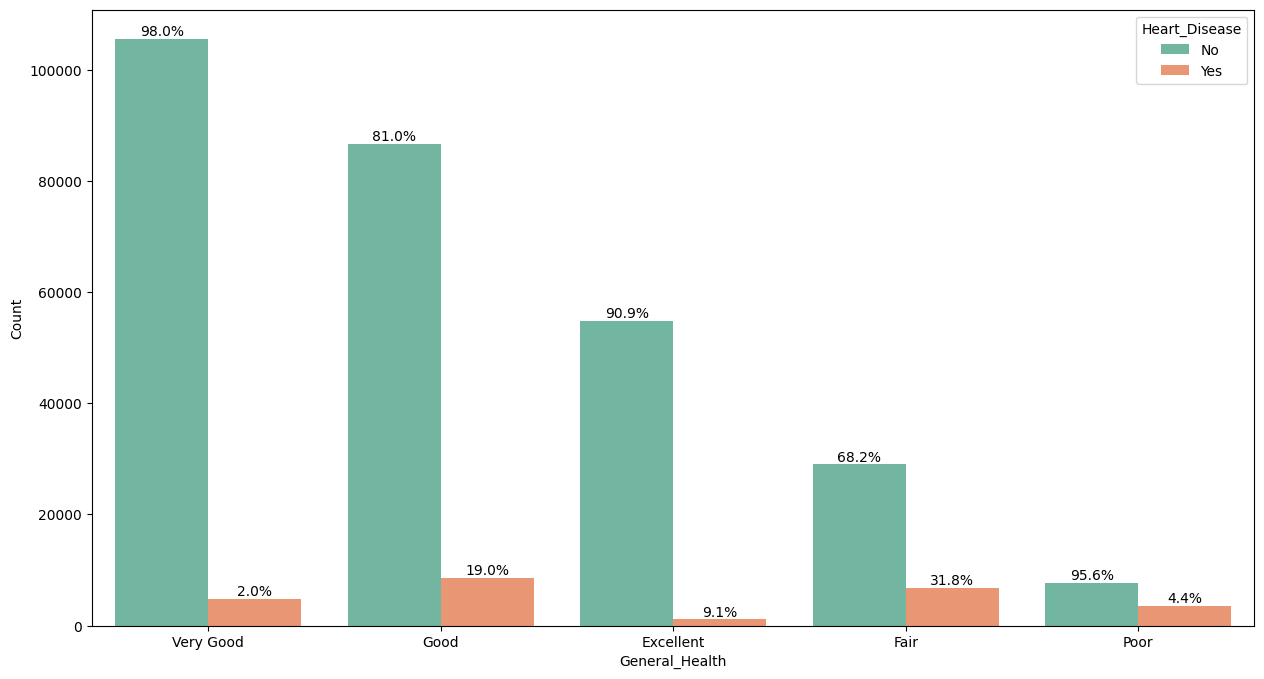

Other_Cancer vs. Heart_Disease


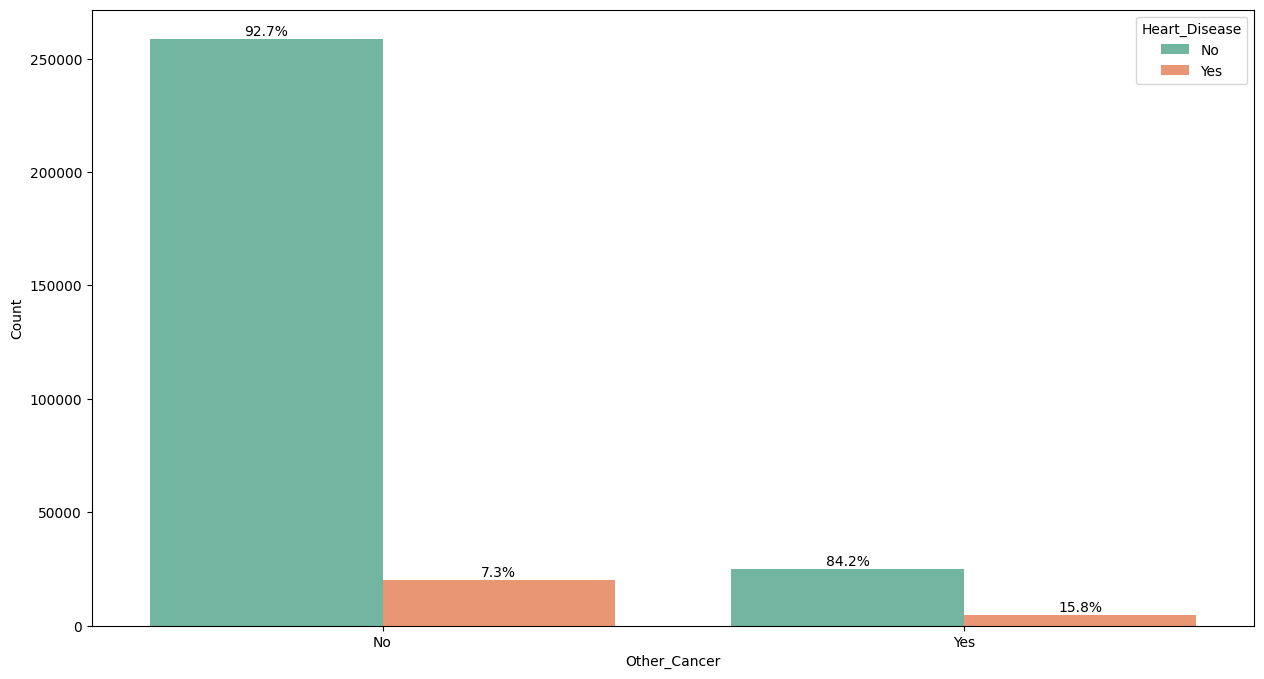

Sex vs. Heart_Disease


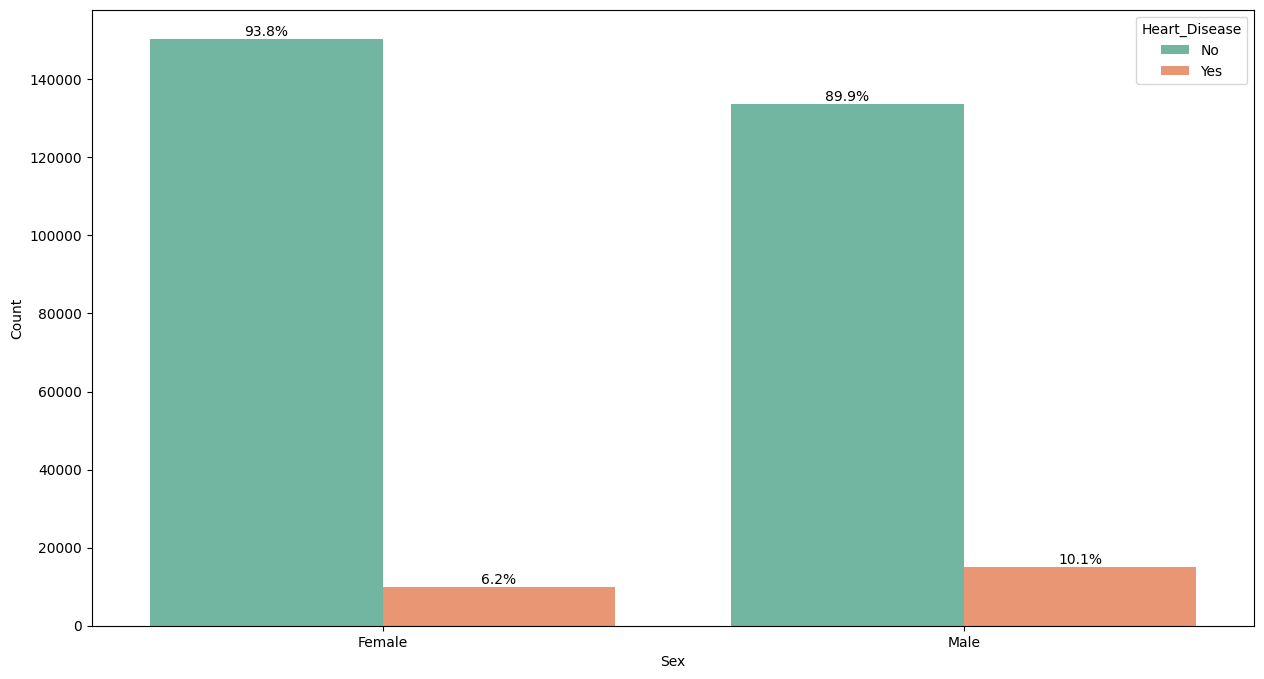

Skin_Cancer vs. Heart_Disease


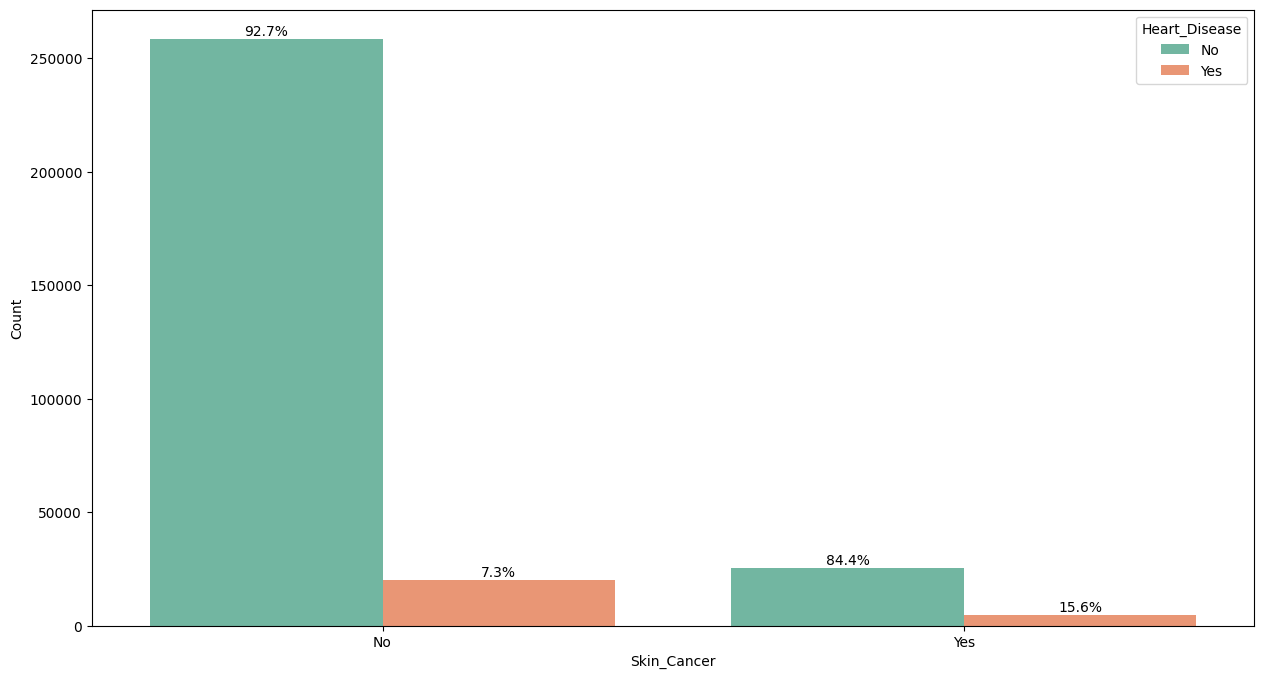

Smoking_History vs. Heart_Disease


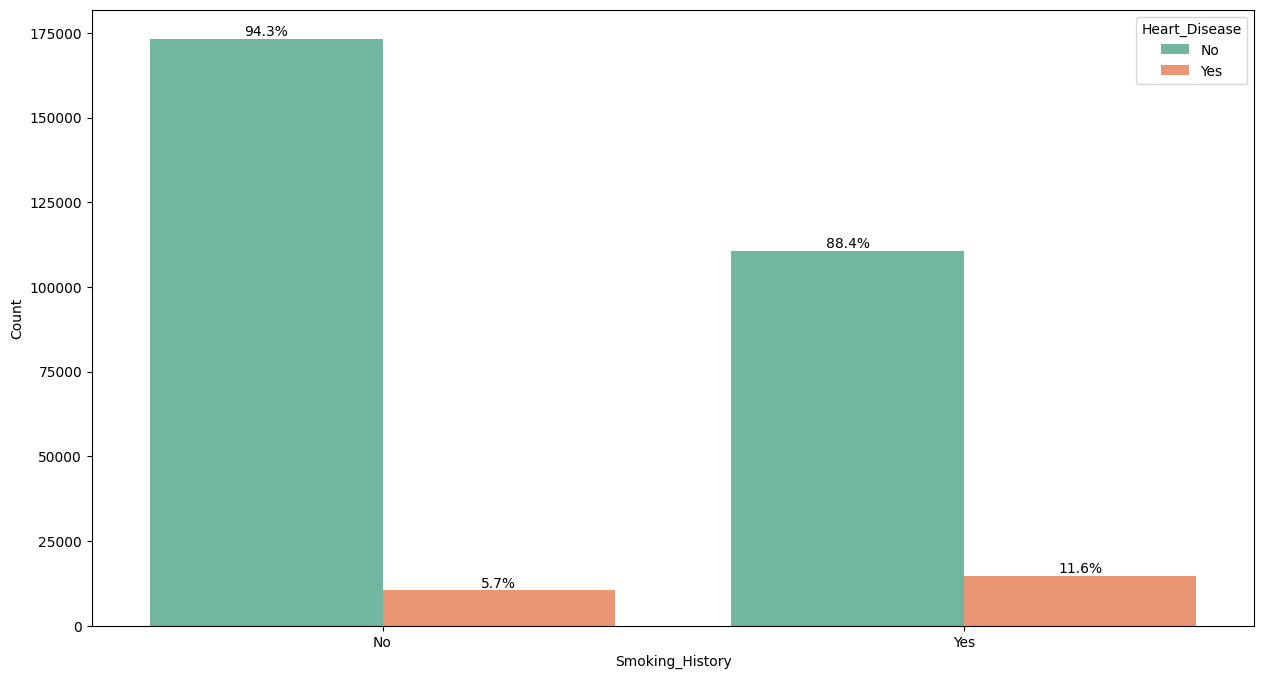

In [130]:
for i in categorical:
        if i == target:
            continue

        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_categorical(df,i,target)
            print('=======================================================')

##### Correlacion entre las variables numericas

<ipython-input-131-63df51e1ebc2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


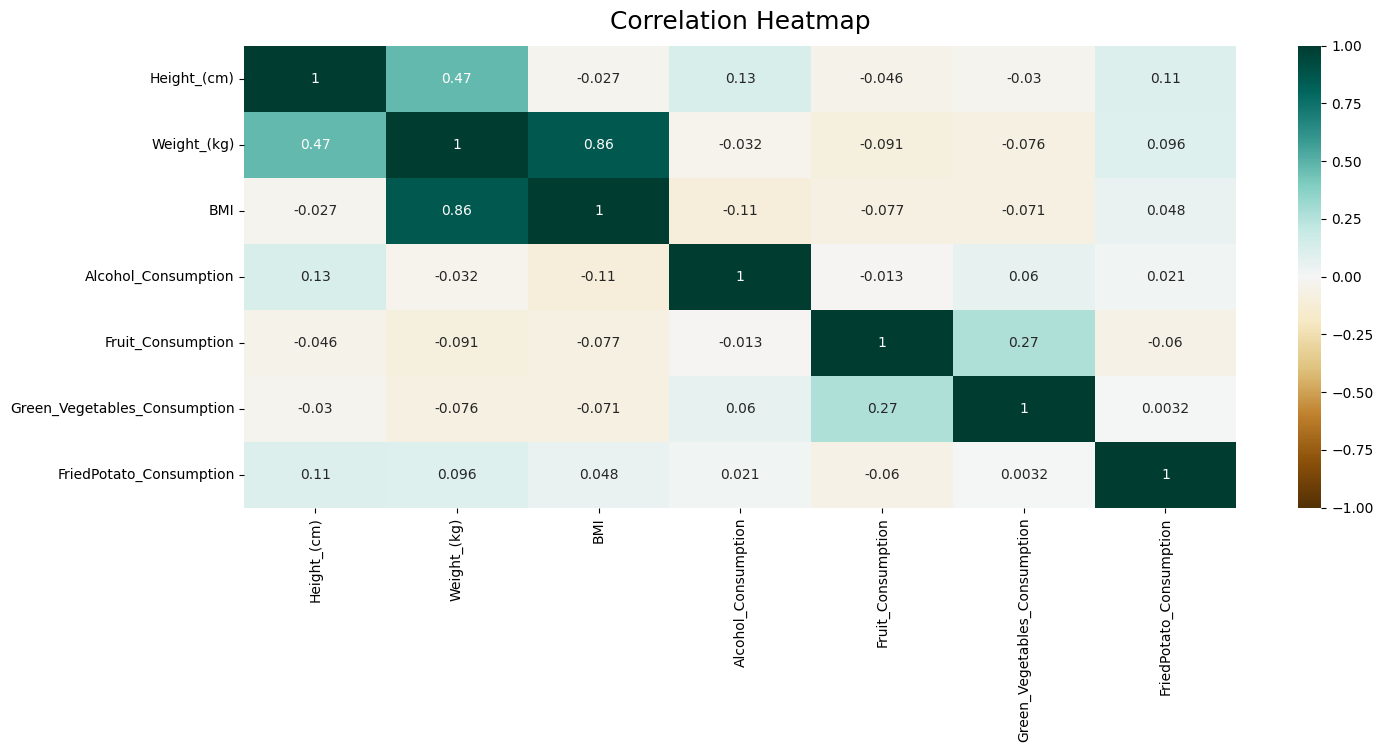

In [131]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### 3. Preprocesado y analisis de los datos

#### 3.1 Eliminación de variables no relevantes

Como hemos podido observar, tenemos las variables weight, heght y BMI, no obstante, la columna de BMI se calcula utilizando las columnas de peso y altura. Por lo tanto, las columnas de peso y altura se eliminan del conjunto de datos, y por tanto, no tendremos que trabajar sus outliers.

In [132]:
df.drop(columns=['Weight_(kg)', 'Height_(cm)'], inplace=True)

#### 3.2 Gestion Valores Nulos o Missing

No tenemos valores nulos o missing.

#### 3.3 Gestion de Outliers

Como habiamos mencionado anteriormente, tenemos nuestras variables categoricas con outliers, estudiemoslas con mas detalle, para conocer cual nos interesa.

<Axes: ylabel='BMI'>

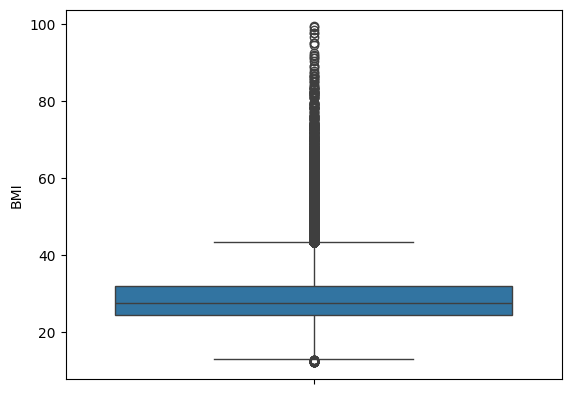

In [133]:
#BMI
sns.boxplot(y=df["BMI"])

Respecto a esta variable, si tenemos algunos outliers, no obstante, en el siguiente apartado transformaremos la variable a categorica, por lo que no nos afecta trabajar con estos outliers.

Asismimo, tampoco nos interesa ya estudiar las variables weight y height.

<Axes: ylabel='Alcohol_Consumption'>

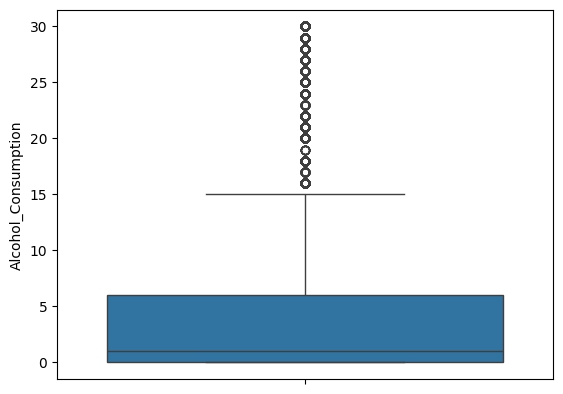

In [134]:
sns.boxplot(y=df["Alcohol_Consumption"])

<Axes: ylabel='Fruit_Consumption'>

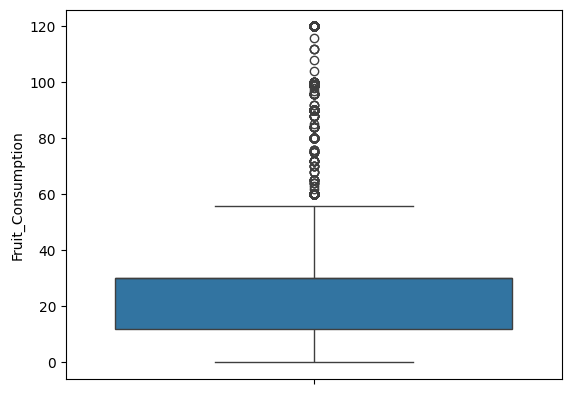

In [135]:
sns.boxplot(y=df["Fruit_Consumption"])

<Axes: ylabel='Green_Vegetables_Consumption'>

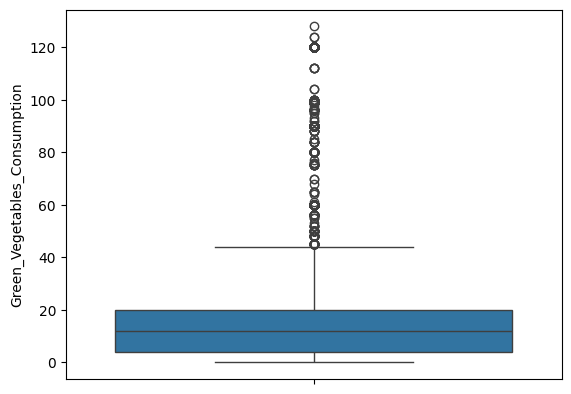

In [136]:
sns.boxplot(y=df["Green_Vegetables_Consumption"])

<Axes: ylabel='FriedPotato_Consumption'>

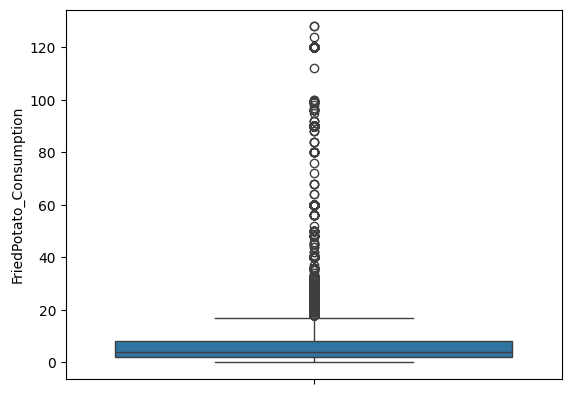

In [137]:
sns.boxplot(y=df["FriedPotato_Consumption"])

In [138]:
variables_interes = ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'Alcohol_Consumption', 'FriedPotato_Consumption']

asimetria_variables = df[variables_interes].apply(lambda x: x.skew())
print(asimetria_variables)

Fruit_Consumption               1.248428
Green_Vegetables_Consumption    2.415608
Alcohol_Consumption             1.885622
FriedPotato_Consumption         4.912350
dtype: float64


Asimetrías en valor absoluto mayores a la unidad son signo de distribución significativamente sesgada a la derecha/positiva (+).

In [139]:
## Función manual de winsor con clip+quantile
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'),
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [140]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):

     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>8

     # Calcular primer cuartil
     q1 = col.quantile(0.25)
     # Calcular tercer cuartil
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)


# Llamada en modo check
resultados_outliers = df[variables_interes].apply(lambda x: gestiona_outliers(x))
print(resultados_outliers)

Fruit_Consumption
Green_Vegetables_Consumption
Alcohol_Consumption
FriedPotato_Consumption
   Fruit_Consumption  Green_Vegetables_Consumption  Alcohol_Consumption  \
0                0.0                      0.000000                  0.0   
1                0.0                      0.259993                  0.0   
2                0.0                      0.259993                  0.0   

   FriedPotato_Consumption  
0                 0.000000  
1                 0.613882  
2                 0.613882  


<ipython-input-140-1e3f0e840b3b>:9: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  criterio1 = abs((col-col.median())/col.mad())>8
<ipython-input-140-1e3f0e840b3b>:9: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  criterio1 = abs((col-col.median())/col.mad())>8
<ipython-input-140-1e3f0e840b3b>:9: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  criterio1 = abs((col-col.median())/col.mad())>8
<ipython-input-140-1e3f0e840b3b>:9: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  criterio1 = abs((col-col.median())/col.mad())>8


#### 3.4 Modificación en valores variables

In [141]:
Age_Category_mapping = {
    '18-24': 'Young',
    '25-29': 'Adult',
    '30-34': 'Adult',
    '35-39': 'Adult',
    '40-44': 'Mid-Aged',
    '45-49': 'Mid-Aged',
    '50-54': 'Mid-Aged',
    '55-59': 'Senior-Adult',
    '60-64': 'Senior-Adult',
    '65-69': 'Elderly',
    '70-74': 'Elderly',
    '75-79': 'Elderly',
    '80+': 'Elderly'
}

# Convertir la columna 'Age_Category' en una variable categórica
df['Age_Category'] = df['Age_Category'].map(Age_Category_mapping).astype('category')


In [142]:
#Cambiar Checkp
df['Checkup'] = df['Checkup'].replace('Within the past 2 years', 'Past 2 years')
df['Checkup'] = df['Checkup'].replace('Within the past year', 'Past 1 year')
df['Checkup'] = df['Checkup'].replace('Within the past 5 years', 'Past 5 years')
df['Checkup'] = df['Checkup'].replace('5 or more years ago', 'More than 5 years')

In [143]:
#Cambiar Diabete
df['Diabetes'] = df['Diabetes'].map({
    'No, pre-diabetes or borderline diabetes': 'Pre-Diabetes' ,
    'Yes, but female told only during pregnancy' : 'Gestational Diabetes',
    'Yes': 'Yes',
    'No': 'No'})

In [144]:
#Variable BMI-group
bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
bmi_labels = ['underweight', 'healthy_weight', 'overweight', 'obese_I', 'obese_II', 'severe_obesity']

df['BMI_group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [145]:
#Borramos BMI
df.drop(columns=['BMI'], inplace=True)

In [146]:
# Crear la nueva columna 'Total_Diseases'
disease_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']
df['Total_Diseases'] = df[disease_columns].eq('Yes').sum(axis=1)

#### 3.6 Transformación de variables a categoricas

In [147]:
print(df.dtypes)

General_Health                    object
Checkup                           object
Exercise                          object
Heart_Disease                     object
Skin_Cancer                       object
Other_Cancer                      object
Depression                        object
Diabetes                          object
Arthritis                         object
Sex                               object
Age_Category                    category
Smoking_History                   object
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
BMI_group                       category
Total_Diseases                     int64
dtype: object


In [148]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
category= list(df.loc[:,df.nunique() < 10]);

# Podemos cambiar el tipo de todas ellas a factor de una vez
df[category] = df[category].astype('category')

In [149]:
print(df.dtypes)

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
BMI_group                       category
Total_Diseases                  category
dtype: object


### 4. Feature Engeenering

#### 4.1 Normalización variables

In [150]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Muestra las listas de variables numéricas y categóricas
print("Variables Numéricas:", numerical_cols)
print("Variables Categóricas:", categorical_cols)

Variables Numéricas: ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
Variables Categóricas: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', 'BMI_group', 'Total_Diseases']


In [151]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder solo a las columnas categóricas
df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Muestra de los primeros registros del DataFrame con las variables categóricas codificadas
print("\nDataFrame con Variables Categóricas Codificadas:")
print(df.head())


DataFrame con Variables Categóricas Codificadas:
   General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               3        3         0              0            0   
1               4        2         0              1            0   
2               4        2         1              0            0   
3               3        2         1              1            0   
4               2        2         0              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0             0           0         1          1    0             1   
1             0           0         3          0    0             1   
2             0           0         3          0    0             3   
3             0           0         3          0    1             1   
4             0           0         1          0    1             1   

   Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0                1                  0.0             

#### 4.2 Coorelation Matrix Heatmap

<Axes: >

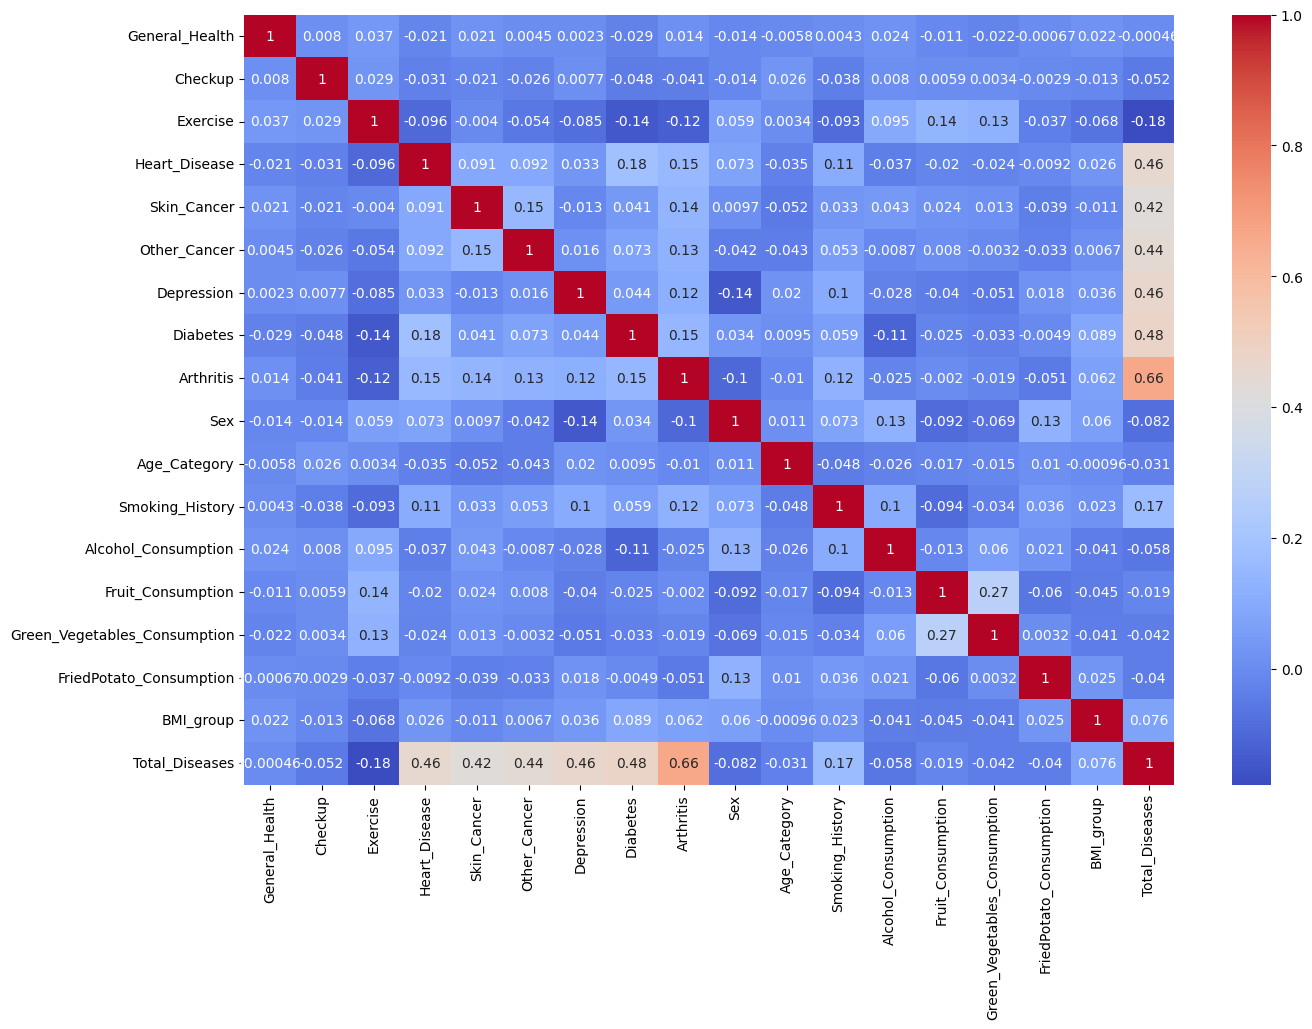

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

A través de esta matriz de correlación se observa la relaciones entre las diferentes variables de nuestro dataset. Es interesante calcular la matriz de correlación entre todas tus variables numéricas y la variable objetivo (presencia de enfermedades cardíacas), pues aquellas variables con una correlación más alta (positiva o negativa) pueden tener más influencia en la predicción de la presencia de enfermedades cardíacas.

De primera, podemos decir, que existe un buena frecuencia de informacion por edades, y que según nuestra matriz de correlacion no existe ningun campo que tenga una gran relacion positiva o negativa con nuestro campo de Heart_Disease

Asimismo, en nuestro caso, las variables con mayores correlaciones con la variable objetivo (Hearth_Disease) son:
- Relaciones Positivas: Total Disease (0,46), Diabetes (0,18), Artitris (0,15), Smoking History (0,11), Other Cancer (0,092), y Skin Cancer (0,091).
- Relaciones Negativas: Exercise (-0,96).

Por ende, podemos decir que padecer algun tipo de enfermedad, asi como fumar influyen negativamente al corazon, por lo que aumentan las posibilidades de padecer enfermedades cardiacas, mientras que hacer ejercicio dismunuye las posibilidades de tener enfermedades caridacas, pero en menor medida que dejar de fumar o no padecer enfermedades. Otras variables como el consumo de alcohol, fruta, o incluso la edad o el BMI no repercueten tanto en el desarrollo de enfermedades cardiacas.


### 5. Modelado

In [153]:
df_modelling = df.copy()

In [154]:
X = df.drop(columns = ['Heart_Disease']).values
y = df['Heart_Disease'].values

In [155]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [156]:
df.head() # data limia y estandarizada


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_group,Total_Diseases
0,3,3,0,0,0,0,0,1,1,0,1,1,0.0,30.0,16.0,12.0,5,1
1,4,2,0,1,0,0,0,3,0,0,1,0,0.0,30.0,0.0,4.0,3,2
2,4,2,1,0,0,0,0,3,0,0,3,0,4.0,12.0,3.0,16.0,1,1
3,3,2,1,1,0,0,0,3,0,1,1,0,0.0,30.0,30.0,8.0,3,2
4,2,2,0,0,0,0,0,1,0,1,1,1,0.0,8.0,4.0,0.0,0,0


In [157]:
df.shape

(308854, 18)

**Datos no balanceados**

Anteriormente ya hemos realizado un analisis detallado de nuestros datos para trabajar outliers, missings, la transformación de la naturaleza de las variables, etc. No osbtante, al encontrarnos con un ejercicio, a priori, de clasificación, y al observar previamente que de nuestra variable objetivo el 91,9% es Heart Disease "no", y solo un 8,1% es "yes", debemos fijarnos si tenemos datos no balanceados.

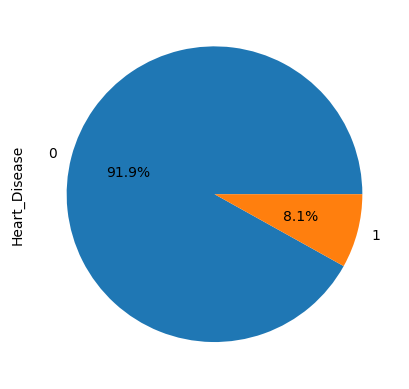

In [158]:
df[target].value_counts().plot.pie(autopct='%1.1f%%')  # *NOTA
plt.show()


Como deciamos, tenemos una base de datos desbalanceada, por lo que recomendamos, para modelos clasificadores, tomar en cuenta la precision , recall y f1 para estudiar que medelo es mejor en lugar de accuracy, que sería mejor para modelos secuenciales.

**Caracteristicas más relevantes para el modelo de clasificación**


In [159]:
columns_to_drop = ['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=columns_to_drop), df['Heart_Disease'], test_size=0.2, random_state=3)


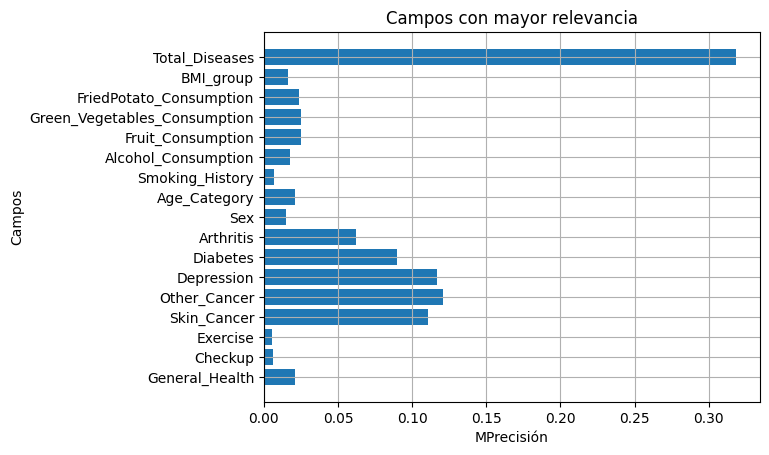

In [160]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf = RFC()                   # Instancio el algoritmo
rf.fit(X_train, y_train)     # Ajusto o entreno el algoritmo
importances = rf.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(17) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Campos con mayor relevancia")
plt.xlabel("MPrecisión")
plt.ylabel("Campos")
plt.yticks(pos, X_train.columns)
plt.grid(True)


Como podemos observar, la variable que hemos creado de "Total Disease" tiene muchisima mas relevancia que el resto, por lo que nos conviene eliminarla, ya que nos generará problemas en el modelado.

In [161]:
columns_to_drop = ['Heart_Disease', 'Total_Diseases']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=columns_to_drop),
                                                    df['Heart_Disease'],
                                                    test_size=0.30,
                                                    # Estratificacion
                                                    stratify=df['Heart_Disease'],
                                                    random_state=100)


In [162]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)


Training set:  (216197, 16) (216197,)
Testing set:  (92657, 16) (92657,)


In [163]:
import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

### discriminativo###
from sklearn.svm import SVC
### generativo####
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [164]:
X_train2 = X_train
X_test2 = X_test

Creacion de formula resultados:

In [165]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X_train2, y_train)
    y_ = model.predict(X_test2)
    accuracy += [accuracy_score(y_test, y_)]
    precision += [precision_score(y_test, y_)]
    recall += [recall_score(y_test, y_)]
    f1 += [f1_score(y_test, y_,average='weighted')]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy),np.mean(precision), np.mean(recall),np.mean(f1),str(end - start)]

In [166]:
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train2, y_train)
    run_model(GaussianNB(), X_train2, y_train)
    run_model(MultinomialNB(), X_train2, y_train)
    run_model(LogisticRegression(max_iter=1000), X_train2, y_train)
    run_model(XGBClassifier(max_depth=None), X_train2, y_train)
    run_model(KNeighborsClassifier(), X_train2, y_train)
    run_model(DecisionTreeClassifier(), X_train2, y_train)


In [167]:
results = pd.DataFrame(columns=['model', 'accuracy','precision','recall','f1','time'])

In [168]:
run_ensemble_models(X_train2, y_train)


RandomForestClassifier
GaussianNB
MultinomialNB
LogisticRegression
XGBClassifier
KNeighborsClassifier
DecisionTreeClassifier


In [169]:
results


,model,accuracy,precision,recall,f1,time
0,RandomForestClassifier,0.914459,0.341588,0.062608,0.886421,36049
1,GaussianNB,0.844135,0.229596,0.393939,0.862142,229
2,MultinomialNB,0.908296,0.302124,0.102523,0.886973,246
3,LogisticRegression,0.918884,0.458472,0.018422,0.883102,4783
4,XGBClassifier,0.919197,0.502865,0.046856,0.887232,2461
5,KNeighborsClassifier,0.913110,0.271615,0.044453,0.883426,120413
6,DecisionTreeClassifier,0.860874,0.193182,0.226939,0.865925,1875


Para estudiar que modelo es mejor, hemos utilizado diferentes metricas para evaluar el rendimiento de los modelos de clasificación.

*Accuracy (Exactitud*):es una medida de la fracción de predicciones correctas realizadas por el modelo. La exactitud es útil cuando las clases objetivo están balanceadas en el conjunto de datos. Sin embargo, puede ser engañosa si las clases no están balanceadas, ya que un modelo puede tener una alta exactitud simplemente prediciendo siempre la clase mayoritaria.

*Precision (Precisión)*: es una medida de la fracción de predicciones positivas que fueron correctas. La precisión es útil cuando el costo de los falsos positivos es alto, es decir, cuando es importante minimizar los falsos positivos.

*Recall (Recuperación o Sensibilidad)*: es una medida de la fracción de ejemplos positivos que fueron correctamente identificados por el modelo.El recall es útil cuando el costo de los falsos negativos es alto, es decir, cuando es importante minimizar los falsos negativos.

*F1-Score:* es la media armónica de precisión y recall. Proporciona un equilibrio entre ambas métricas. El F1-Score es útil cuando hay un desequilibrio entre las clases objetivo y se desea encontrar un equilibrio entre la precisión y el recall.

En este caso, al encontrarnos con un dataset con datos no balanceados, y un modelo de clasificación, descartamos usar Accurary para evaluar los modelos. Por ello, parecer ser que los modelos mas interesantes son RandomForestClassifier y XGBClasifier.

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [171]:
# Entrenar el modelo RandomForestClassifier
RF = RandomForestClassifier().fit(X_train2, y_train)
y_pred = RF.predict(X_test2)

# Evaluar el modelo RandomForestClassifier
print("Informe de clasificación RandomForestClassifier:")
print(classification_report(y_test,y_pred))

print("n/Matriz de Confusion RandomForestClassifier: /n")
y_valid_predicted_dt = RF.predict(X_test2)
confusion_matrix_test_RF = confusion_matrix(y_test, y_valid_predicted_dt)
print(confusion_matrix_test_RF)

Informe de clasificación RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     85166
           1       0.33      0.06      0.10      7491

    accuracy                           0.91     92657
   macro avg       0.63      0.52      0.53     92657
weighted avg       0.88      0.91      0.89     92657

n/Matriz de Confusion RandomForestClassifier: /n
[[84259   907]
 [ 7037   454]]


El modelo RandomForestClassifier tiene un número significativo de falsos negativos (7041), lo que indica que clasifica erróneamente muchos ejemplos positivos como negativos. Sin embargo, también tiene un número considerable de verdaderos positivos (450), lo que sugiere que es capaz de identificar correctamente algunas instancias positivas.

In [172]:
# Entrenar el modelo XGBClassifier
XGB = XGBClassifier().fit(X_train2, y_train)
y_pred_xgb = XGB.predict(X_test2)

# Evaluar el modelo XGBClassifier
print("Informe de clasificación XGBClassifier:")
print(classification_report(y_test, y_pred_xgb))

print("Matriz de Confusión XGBClassifier:")
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(confusion_matrix_xgb)

Informe de clasificación XGBClassifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85166
           1       0.50      0.05      0.09      7491

    accuracy                           0.92     92657
   macro avg       0.71      0.52      0.52     92657
weighted avg       0.89      0.92      0.89     92657

Matriz de Confusión XGBClassifier:
[[84819   347]
 [ 7140   351]]


El modelo XGBClassifier muestra una mejora en la identificación de verdaderos positivos en comparación con los otros modelos, con 351 casos correctamente identificados. Sin embargo, también tiene un número considerable de falsos negativos (7140), lo que indica que aún hay margen de mejora en la capacidad del modelo para identificar instancias positivas.

En base a estas evaluaciones, parece que el RandomForestClassifier tiene un rendimiento más equilibrado entre la identificación de verdaderos positivos y la minimización de falsos negativos en comparación con los otros modelos. Aunque tiene un número significativo de falsos negativos, su capacidad para identificar instancias positivas es mejor en comparación con XGBClassifier. Por lo tanto, en este caso, podríamos considerar el RandomForestClassifier como el mejor modelo. Sin embargo, debido a que tenemos un dataset desbananceado prodecemos a utilizar otras tecnicas antes de elegir un modelo.

**SMOKE y Bagging**:

Teniendo en cuenta que tenemos un dataset desbalanceado, propongo usar la tecnicas como "SMOTE" y Bagging


*SMOKE* : Aumenta la cantidad de instancias de la clase minoritaria mediante técnicas como duplicación de ejemplos o generación sintética

In [173]:
from imblearn.over_sampling import SMOTE


In [174]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [175]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X_resampled, y_resampled)
    y_ = model.predict(X_test2)
    accuracy += [accuracy_score(y_test, y_)]
    precision += [precision_score(y_test, y_)]
    recall += [recall_score(y_test, y_)]
    f1 += [f1_score(y_test, y_,average='weighted')]
    end = int(time.time() * 1000)
    results_smoke.loc[len(results_smoke)] = [model_name, np.mean(accuracy),np.mean(precision), np.mean(recall),np.mean(f1),str(end - start)]

In [176]:
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_resampled, y_resampled)
    run_model(GaussianNB(), X_resampled, y_resampled)
    run_model(MultinomialNB(), X_resampled, y_resampled)
    run_model(LogisticRegression(max_iter=1000), X_train2, y_train)
    run_model(XGBClassifier(max_depth=None), X_train2, y_train)
    run_model(KNeighborsClassifier(), X_resampled, y_resampled)
    run_model(DecisionTreeClassifier(), X_resampled, y_resampled)


In [177]:
results_smoke = pd.DataFrame(columns=['model', 'accuracy','precision','recall','f1','time'])

In [178]:
run_ensemble_models(X_train2, y_train)


RandomForestClassifier
GaussianNB
MultinomialNB
LogisticRegression
XGBClassifier
KNeighborsClassifier
DecisionTreeClassifier


In [179]:
results_smoke


,model,accuracy,precision,recall,f1,time
0,RandomForestClassifier,0.865008,0.224371,0.272594,0.870913,96496
1,GaussianNB,0.635915,0.123990,0.577626,0.718708,342
2,MultinomialNB,0.494275,0.101651,0.670538,0.598009,295
3,LogisticRegression,0.687967,0.124206,0.472567,0.757089,12145
4,XGBClassifier,0.850578,0.229248,0.359098,0.865158,6399
5,KNeighborsClassifier,0.730263,0.127712,0.400748,0.785948,205440
6,DecisionTreeClassifier,0.820208,0.171162,0.318516,0.843722,3551


In [180]:
RF2 = RandomForestClassifier().fit(X_resampled, y_resampled)

In [181]:
print("\nMatriz de confusión:\n")
y_valid_predicted_dt = RF2.predict(X_test2)
confusion_matrix_test = confusion_matrix(y_test, y_valid_predicted_dt)
print(confusion_matrix_test)



Matriz de confusión:

[[78036  7130]
 [ 5443  2048]]


En este caso, el modelo tiene un número más alto de verdaderos positivos en comparación con los falsos positivos, lo que indica que está clasificando más correctamente las instancias positivas que las negativas. Sin embargo, aún tiene un número considerable de falsos negativos.

In [182]:
XGB1 = XGBClassifier(max_depth=None).fit(X_resampled, y_resampled)


In [183]:
print("\nMatriz de confusión:\n")
y_valid_predicted_dt = XGB1.predict(X_test2)
confusion_matrix_test = confusion_matrix(y_test, y_valid_predicted_dt)
print(confusion_matrix_test)



Matriz de confusión:

[[76122  9044]
 [ 4801  2690]]


Este modelo también muestra una mejora en la identificación de verdaderos positivos en comparación con los falsos positivos. Sin embargo, tiene un número aún más alto de falsos positivos y falsos negativos en comparación con RandomForestClassifier.

En base a estas nuevas matrices de confusión, el RandomForestClassifier sigue mostrando un mejor equilibrio entre la identificación de verdaderos positivos y la minimización de falsos positivos en comparación con XGBClassifier. Aunque ambos modelos tienen margen de mejora en la identificación de falsos negativos, parece que RandomForestClassifier sigue siendo el mejor modelo en este caso.

*Bagging* :El desbalance en los datos puede afectar negativamente el rendimiento de muchos algoritmos de clasificación, ya que pueden inclinarse hacia la clase mayoritaria y no prestar suficiente atención a la clase minoritaria. El BalancedBaggingClassifier busca resolver este problema al equilibrar automáticamente las clases durante el proceso de bagging.

Vamos a realizarlo unicamente para Random Forest, ya que para XGBoost en muchos casos puede que no sea necesario o incluso redundante, ya que XGBoost por sí solo tiende a proporcionar un rendimiento muy sólido

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.ensemble import BalancedBaggingClassifier


bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


In [185]:
bbc.fit(X_train2, y_train)
y_pred = bbc.predict(X_test2)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [186]:
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:\n")
y_valid_predicted_dt = bbc.predict(X_test2)
confusion_matrix_test = confusion_matrix(y_test, y_valid_predicted_dt)
print(confusion_matrix_test)


              precision    recall  f1-score   support

           0       0.97      0.76      0.85     85166
           1       0.21      0.73      0.33      7491

    accuracy                           0.75     92657
   macro avg       0.59      0.74      0.59     92657
weighted avg       0.91      0.75      0.81     92657


Matriz de confusión:

[[64421 20745]
 [ 2003  5488]]


Asi pues, tras realizar SKOKE y Bagging, de los dos modelos que teniamos en cuenta, a pesar de tener un matrix un poco peor XGBoost que Random Forest, sus indicadores de presicion y recall son los mas equilibrados, además, XGBoost tambien muestra un f1 mayor, por lo que nos quedamos con este modelo.

Indicadores del modelo XGBoost:
- Precision 0,229248
- Recall 0,359098
- F1 0,865158

## 6. Guardar y Probar el Modelo

Guardamos el modelos y subimos un archivo para hacer una prueba.

In [187]:
import pickle
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Especifica la ruta y el nombre de archivo donde deseas guardar el modelo en tu Google Drive
ruta_guardado = "/content/drive/MyDrive/TFM/modelo_XGB1.sav"

# Guardar el modelo en Google Drive utilizando pickle
with open(ruta_guardado, 'wb') as file:
    pickle.dump(XGB1, file)

print("El modelo se ha guardado exitosamente en tu Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
El modelo se ha guardado exitosamente en tu Google Drive.


Vamos a probar que el modelo funcione. Asi pues, utilizamos un archivo excel con datos de 10 pacientes para hacer dicha prueba.

In [189]:
# Especifica la ruta del archivo Excel
ruta_archivo = '/content/drive/MyDrive/TFM/prueba.xlsx'

# Cargar el archivo Excel
File = pd.ExcelFile(ruta_archivo)

# Extraer la hoja llamada 'pruebas' del archivo Excel
x1 = File.parse('pruebas')

# Cerrar el archivo Excel
File.close()

In [191]:
load_model = pickle.load(open("/content/drive/MyDrive/TFM/modelo_XGB1.sav", "rb"))
prediction = load_model.predict(x1)

In [192]:
prediction = pd.DataFrame(prediction, columns=['prediction'])
prediction['Heart_Disease'] = prediction['prediction'].apply(
    lambda x: 'CON problemas' if x == 1 else 'SIN problemas')

prediction

,prediction,Heart_Disease
0,0,SIN problemas
1,0,SIN problemas
2,0,SIN problemas
3,1,CON problemas
4,0,SIN problemas
5,0,SIN problemas
6,0,SIN problemas
7,0,SIN problemas
8,0,SIN problemas
9,0,SIN problemas
